In [66]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [67]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [68]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [69]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [70]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'FaceFats'
Project_Folder_data = Project + Project_Name + '/mzml_liver_OzON/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'FaceFats'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: FaceFats
Project_Folder_data: ./Projects/FaceFats/mzml_liver_OzON/
Project_results: ./Projects/FaceFats/results/
file_name_to_save: FaceFats
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [71]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [72]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/FaceFats/mzml_liver_OzON/12012023_DOD73_M2_5xFAD_liver_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_liver_OzON/12012023_FAD131_M1_5xFAD_liver_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_liver_OzON/12012023_FAD131_M2_5xFAD_liver_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_liver_OzON/12012023_FAD131_M4_5xFAD_liver_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_liver_OzON/12012023_FAD173_M1_5xFAD_liver_O3on_01.mzML

Finished parsing all mzML files



In [73]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,23873.981735,NaN,584.4,437.3,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
1,NaN,30013.202080,NaN,612.4,437.3,12012023_DOD73_M2_5xFAD_liver_O3on_01,612.4 -> 437.3
2,NaN,27567.021954,NaN,622.5,503.4,12012023_DOD73_M2_5xFAD_liver_O3on_01,622.5 -> 503.4
3,NaN,30535.462173,NaN,624.5,505.4,12012023_DOD73_M2_5xFAD_liver_O3on_01,624.5 -> 505.4
4,NaN,81457.065533,NaN,626.5,437.3,12012023_DOD73_M2_5xFAD_liver_O3on_01,626.5 -> 437.3
...,...,...,...,...,...,...,...
1495,TAG,233716.696194,"[TG(57:9),TG(56:2)]_FA18:1",932.9,633.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,932.9 -> 633.6
1496,TAG,49685.523727,"[TG(58:7),TG(57:0)]_FA18:1",950.9,651.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,950.9 -> 651.6
1497,TAG,34257.062469,"[TG(59:13),TG(58:6)]_FA18:1",952.8,653.5,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5
1498,TAG,40613.842754,"[TG(59:12),TG(58:5)]_FA18:1",954.8,655.5,12012023_FAD173_M1_5xFAD_liver_O3on_01,954.8 -> 655.5


In [74]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,584.4,437.3,0.044183,41.140003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
1,NaN,584.4,437.3,0.088567,41.120003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
2,NaN,584.4,437.3,0.132967,41.140003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
3,NaN,584.4,437.3,0.177367,41.060001,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
4,NaN,584.4,437.3,0.221783,41.100002,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
...,...,...,...,...,...,...,...
844487,NaN,956.9,657.6,24.779117,41.080002,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844488,NaN,956.9,657.6,24.823533,40.980003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844489,NaN,956.9,657.6,24.867933,40.980003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844490,NaN,956.9,657.6,24.912333,40.960003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [75]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (9.5, 21.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
filtered_d1 = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
filtered_d1

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
213,584.4,437.3,9.502800,41.140003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
214,584.4,437.3,9.547217,41.140003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
215,584.4,437.3,9.591617,41.000004,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
216,584.4,437.3,9.636017,40.960003,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
217,584.4,437.3,9.680433,41.040005,12012023_DOD73_M2_5xFAD_liver_O3on_01,584.4 -> 437.3
...,...,...,...,...,...,...
844409,956.9,657.6,21.315367,41.180004,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844410,956.9,657.6,21.359783,41.060001,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844411,956.9,657.6,21.404183,41.240002,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
844412,956.9,657.6,21.448600,41.240002,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6


Add lipid info functions

In [76]:
from collections import defaultdict

def add_lipid_info(matched_dataframe, db_pos, tolerance=0.3):
    """
    Adds lipid information to the data frame based on matched ions within a certain tolerance.

    :param matched_dataframe: DataFrame containing matched lipids and ion data.
    :param db_pos: List of integer values representing the positions in the OzESI list to be checked.
    :param tolerance: The acceptable difference between ion values to be considered a match.

    :return: Updated DataFrame with added lipid information.
    """
    working_dataframe = matched_dataframe.copy()  # Create a copy for processing
    final_dataframe = matched_dataframe.copy()    # Create a copy for final output

    # Convert respective column values to float for given db_pos
    for position in db_pos:
        working_dataframe['n-' + str(position)] = working_dataframe['n-' + str(position)].astype(float)

    # Iterate over the rows of the DataFrame to match lipids
    for i in range(len(working_dataframe)):
        if pd.isna(working_dataframe.loc[i, 'Lipid']):
            parent_ion = working_dataframe.loc[i, 'Parent_Ion']

            # Look for matching ions within tolerance
            for j in range(len(working_dataframe)):
                current_row = working_dataframe.loc[j].copy()

                # If the parent ion is within tolerance and the Lipid column is a string
                for n in db_pos:
                    print(f"Checking match for Parent_Ion: {parent_ion}, n-{n}: {current_row[f'n-{n}']}, Lipid: {current_row['Lipid']}")
                    
                    if within_tolerance(parent_ion, current_row[f'n-{n}'], tolerance) and isinstance(current_row['Lipid'], str):
                        working_dataframe.loc[i, 'Lipid'] = current_row['Lipid']
                        working_dataframe.loc[i, 'db_pos'] = f'n-{n}' + current_row['db_pos']

                        # Append to the final_dataframe
                        appended_row = working_dataframe.loc[i].copy()
                        appended_row['db_pos'] = f'n-{n}' + current_row['db_pos']
                        final_dataframe = final_dataframe.append(appended_row, ignore_index=True)

    # Drop rows in the final_dataframe where 'Lipid' column value is NaN
    final_dataframe.dropna(subset=['Lipid'], inplace=True)

    return final_dataframe

def within_tolerance(a, b, tolerance=0.3):
    """
    Checks if the absolute difference between two values is within a given tolerance.
    
    :param a: First value to compare.
    :param b: Second value to compare.
    :param tolerance: The acceptable difference between the two values. Defaults to 0.3.
    
    :return: Boolean indicating whether the difference is within the given tolerance.
    """
    return abs(a - b) <= tolerance


def match_lipids_parser(mrm_database, df, tolerance=0.3):
    """
    Performs lipid matching by creating an ion dictionary from the MRM database and applying the match_ions function to each row of a DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    :param df: DataFrame containing ion information to be matched.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: DataFrame with matched lipid and class information if matches were found.
    """
    ion_dict = create_ion_dict(mrm_database)
    df_matched = df.apply(lambda row: match_ions(row, ion_dict=ion_dict, tolerance=tolerance), axis=1)
    return df_matched

def create_ion_dict(mrm_database):
    """
    Creates a dictionary of ions from an MRM database DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    
    :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
    """
    ion_dict = defaultdict(list)
    for index, row in mrm_database.iterrows():
        ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
    return ion_dict


def match_ions(row, ion_dict, tolerance=0.3):
    """
    Matches the ions in a DataFrame row with the ions in an ion dictionary.
    
    :param row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.
    :param ion_dict: A dictionary of ion pairs and their corresponding lipid and class information.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: The original row updated with matched lipid and class information if matches were found.
    """
    ions = (row['Parent_Ion'], row['Product_Ion'])
    matched_lipids = []
    matched_classes = []

    for key, value in ion_dict.items():
        if within_tolerance(ions[0], key[0], tolerance) and within_tolerance(ions[1], key[1], tolerance):
            matched_lipids.extend([match[0] for match in value])
            matched_classes.extend([match[1] for match in value])

    if matched_lipids and matched_classes:
        row['Lipid'] = ' | '.join(matched_lipids)
        row['Class'] = ' | '.join(matched_classes)

    return row



def match_lipids_with_rt(df, df_MRM_RT_correct, ion_tolerance=0.3, rt_tolerance=0.3):
    """
    Performs lipid matching based on both ion values and retention time.

    :param df: DataFrame containing ion information to be matched.
    :param df_MRM_RT_correct: DataFrame containing the MRM database information with retention time.
    :param ion_tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    :param rt_tolerance: The acceptable difference between retention times to be considered a match. Defaults to 0.5.

    :return: DataFrame with matched lipid, class, and retention time information if matches were found.
    """

 

    # Merging the MRM database with the input DataFrame on ion values within the specified ion tolerance
    merged_df = pd.merge(df, df_MRM_RT_correct, on=['Parent_Ion', 'Product_Ion'], how='inner')

    # Filter the merged DataFrame based on the ion and retention time tolerance
    matched_df = merged_df[
        (abs(merged_df['Retention_Time'] - merged_df['Retention_Time']) <= rt_tolerance) &
        (abs(merged_df['Parent_Ion'] - merged_df['Parent_Ion']) <= ion_tolerance) &
        (abs(merged_df['Product_Ion'] - merged_df['Product_Ion']) <= ion_tolerance)
    ]

    # Selecting relevant columns and renaming them if necessary
    matched_df = matched_df[['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time']]
    matched_df.rename(columns={'Retention_Time_x': 'Retention_Time'}, inplace=True)

    return matched_df


def calculate_DB_Position(df_matched_ions, db_pos_list=[7,9,12]):
    """
    Creates a new DataFrame to store the DB_Position and Aldehyde_Ion values,
    and calculate n-i values for the given db_pos_list.
    
    Parameters:
        df_matched_ions (pd.DataFrame): Input DataFrame containing matched ions.
        db_pos_list (list): List of OzESI positions to calculate n-i values.
        
    Returns:
        pd.DataFrame: Modified DataFrame with new calculated columns for n-i values.
    """
    # Create a DataFrame to store the DB_Position and corresponding Aldehyde_Ion values
    df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

    # Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
    for position in range(3, 21):
        df_DB_aldehyde.loc[position, 'DB_Position'] = position
        df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

    # Loop through the specified db_pos_list
    for ozesi_position in db_pos_list:
        # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
        aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

        # Calculate and store the n-i value for the current OzESI position
        df_matched_ions["n-{}".format(ozesi_position)] = df_matched_ions["Parent_Ion"] - aldehyde_ion

    return df_matched_ions



Correct RTs add DB position based on correct RT

In [77]:
Correct_RT_directory = 'tools/RT/'
#MRM CORRECT RT DF
df_MRM_RT_correct = pd.read_csv(Correct_RT_directory + 'FF_MRM_CorrectRT_Liver_12dec23.csv') #correct MRM RT
df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time'].values
print(df_MRM_RT_correct)
# df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time']

# List of new column names based on db_pos_list
db_column_names = []
db_pos_list = [7, 9, 10, 12]


df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

# Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

for number in db_pos_list:
    db_column_names.append(f'n-{number}')

# Create an empty DataFrame with initial columns
df_db_pos = pd.DataFrame(columns=['Lipid', 'Retention_Time', 'Parent_Ion','Product_Ion'])

# Append new column names to the DataFrame
for column_name in db_column_names:
    df_db_pos[column_name] = pd.NA  # Initialize the new columns with NA

# df_DB_aldehyde #aldehyde ion values


#append df_MRM_RT_correct to df_db_pos
df_db_pos = df_db_pos.append(df_MRM_RT_correct, ignore_index=True)


# Loop through the specified db_pos_list
for ozesi_position in db_pos_list:
    # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
    aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

    # Calculate and store the n-i value for the current OzESI position
    df_db_pos["n-{}".format(ozesi_position)] = df_db_pos["Parent_Ion"] - aldehyde_ion


df_db_pos.to_csv('df_db_pos.csv')
# df_MRM_RT_correct  #correct MRM RT
#drop Average_Retention_Time column from df db pos
df_db_pos  #empty df with n-7, n-9, n-10, n-12 columns





                          Lipid  Average_Retention_Time  Parent_Ion  \
0             [TG(50:3)]_FA18:1                   14.00       846.8   
1             [TG(52:5)]_FA16:1                   12.75       870.8   
2             [TG(52:6)]_FA18:2                   11.55       868.8   
3    [TG(52:7),TG(51:0)]_FA18:1                   17.06       866.8   
4             [TG(54:5)]_FA18:1                   13.91       898.8   
5             [TG(54:6)]_FA18:1                   12.80       896.8   
6   [TG(55:10),TG(54:3)]_FA18:1                   16.26       902.8   
7   [TG(55:11),TG(54:4)]_FA16:1                   15.01       900.8   
8   [TG(55:11),TG(54:4)]_FA18:1                   15.10       900.8   
9    [TG(55:8),TG(54:1)]_FA18:1                   18.61       906.8   
10   [TG(55:9),TG(54:2)]_FA18:1                   17.50       904.8   
11  [TG(56:10),TG(55:3)]_FA18:1                   16.79       916.8   
12  [TG(56:11),TG(55:4)]_FA18:1                   15.68       914.8   
13    

,Lipid,Retention_Time,Parent_Ion,Product_Ion,n-7,n-9,n-10,n-12,Average_Retention_Time
0,[TG(50:3)]_FA18:1,14.00,846.8,547.5,764.8,736.8,722.8,694.8,14.00
1,[TG(52:5)]_FA16:1,12.75,870.8,599.5,788.8,760.8,746.8,718.8,12.75
2,[TG(52:6)]_FA18:2,11.55,868.8,571.5,786.8,758.8,744.8,716.8,11.55
3,"[TG(52:7),TG(51:0)]_FA18:1",17.06,866.8,567.5,784.8,756.8,742.8,714.8,17.06
4,[TG(54:5)]_FA18:1,13.91,898.8,599.5,816.8,788.8,774.8,746.8,13.91
5,[TG(54:6)]_FA18:1,12.80,896.8,597.5,814.8,786.8,772.8,744.8,12.80
6,"[TG(55:10),TG(54:3)]_FA18:1",16.26,902.8,603.5,820.8,792.8,778.8,750.8,16.26
7,"[TG(55:11),TG(54:4)]_FA16:1",15.01,900.8,629.5,818.8,790.8,776.8,748.8,15.01
8,"[TG(55:11),TG(54:4)]_FA18:1",15.10,900.8,601.5,818.8,790.8,776.8,748.8,15.10
9,"[TG(55:8),TG(54:1)]_FA18:1",18.61,906.8,607.5,824.8,796.8,782.8,754.8,18.61


Filter through filtered_d1 based on matched OzOFF lipids df_db_pos for n-7 and n-9 values

In [78]:
# # Adjusting the code to include a tolerance of ±0.3 for Parent and Product ions

# tolerance = 0.3

# # Re-initializing an empty DataFrame for filtered_d2
# filtered_d2 = pd.DataFrame()

# # Iterating through df_db_pos
# for index, row in df_db_pos.iterrows():
#     retention_time = row['Retention_Time']
#     product_ion = row['Product_Ion']
#     parent_ion_n7 = row['n-7']
#     parent_ion_n9 = row['n-9']

#     # Defining the retention time window (±0.5)
#     lower_bound_time = retention_time - 0.2
#     upper_bound_time = retention_time + 0.2

#     # Defining the tolerance for Parent and Product ions
#     lower_bound_ion = product_ion - tolerance
#     upper_bound_ion = product_ion + tolerance

#     # Filtering filtered_d1 within the specified window and matching ions with tolerance
#     matches = filtered_d1[(filtered_d1['Retention_Time'] >= lower_bound_time) & 
#                           (filtered_d1['Retention_Time'] <= upper_bound_time) &
#                           (filtered_d1['Product_Ion'] >= lower_bound_ion) &
#                           (filtered_d1['Product_Ion'] <= upper_bound_ion) &
#                           ((filtered_d1['Parent_Ion'] >= parent_ion_n7 - tolerance) &
#                            (filtered_d1['Parent_Ion'] <= parent_ion_n7 + tolerance) |
#                            (filtered_d1['Parent_Ion'] >= parent_ion_n9 - tolerance) &
#                            (filtered_d1['Parent_Ion'] <= parent_ion_n9 + tolerance))]

#     # Append the matching rows to filtered_d2
#     filtered_d2 = filtered_d2.append(matches)

# # Resetting the index of the new DataFrame
# filtered_d2 = filtered_d2.reset_index(drop=True)

# # Display the first few rows of the new DataFrame
# filtered_d2


In [79]:
# # Assuming df_db_pos and filtered_d1 are your DataFrames

# tolerance = 0.3
# retention_time_tolerance = 0.4  # Adjust this value as needed

# # Re-initializing an empty DataFrame for filtered_d2
# filtered_d2 = pd.DataFrame()

# # Iterating through df_db_pos
# for index, row in df_db_pos.iterrows():
#     ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
#     product_ion = row['Product_Ion']
#     parent_ion_n7 = row['n-7']
#     parent_ion_n9 = row['n-9']
#     parent_ion_n10 = row['n-10']
#     parent_ion_n12 = row['n-12']

#     # Defining the retention time window based on ground truth
#     lower_bound_time = ground_truth_retention_time - retention_time_tolerance
#     upper_bound_time = ground_truth_retention_time + retention_time_tolerance

#     # Defining the tolerance for Parent and Product ions
#     lower_bound_ion = product_ion - tolerance
#     upper_bound_ion = product_ion + tolerance

#     # Filtering filtered_d1 within the specified window and matching ions with tolerance
#     matches = filtered_d1[(filtered_d1['Retention_Time'] >= lower_bound_time) & 
#                         (filtered_d1['Retention_Time'] <= upper_bound_time) &
#                         (filtered_d1['OzESI_Intensity'] >= 500) &
#                         (filtered_d1['Product_Ion'] >= lower_bound_ion) &
#                         (filtered_d1['Product_Ion'] <= upper_bound_ion)]

#     # Adding 'db' column based on the tolerance matching
#     matches['db'] = ''
#     matches.loc[(matches['Parent_Ion'] >= parent_ion_n7 - tolerance) & 
#                 (matches['Parent_Ion'] <= parent_ion_n7 + tolerance), 'db'] = 'n-7'
#     matches.loc[(matches['Parent_Ion'] >= parent_ion_n9 - tolerance) & 
#                 (matches['Parent_Ion'] <= parent_ion_n9 + tolerance), 'db'] = 'n-9'
#     matches.loc[(matches['Parent_Ion'] >= parent_ion_n10 - tolerance) & 
#                 (matches['Parent_Ion'] <= parent_ion_n10 + tolerance), 'db'] = 'n-10'
#     matches.loc[(matches['Parent_Ion'] >= parent_ion_n12 - tolerance) & 
#                 (matches['Parent_Ion'] <= parent_ion_n12 + tolerance), 'db'] = 'n-12'

#     # Append the matching rows to filtered_d2
#     filtered_d2 = filtered_d2.append(matches)

# # Resetting the index of the new DataFrame
# filtered_d2 = filtered_d2.reset_index(drop=True)

# # Display the first few rows of the new DataFrame
# filtered_d2


In [80]:
# Assuming df_db_pos and filtered_d1 are your DataFrames

tolerance = 0.3
retention_time_tolerance = 0.4  # Adjust this value as needed

# Re-initializing an empty DataFrame for filtered_d2
filtered_d2 = pd.DataFrame()

# Iterating through df_db_pos
for index, row in df_db_pos.iterrows():
    ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
    product_ion = row['Product_Ion']
    parent_ion_n7 = row['n-7']
    parent_ion_n9 = row['n-9']
    parent_ion_n10 = row['n-10']
    parent_ion_n12 = row['n-12']
    lipid_name = row['Lipid']  # Extracting Lipid name from df_db_pos

    # Defining the retention time window based on ground truth
    lower_bound_time = ground_truth_retention_time - retention_time_tolerance
    upper_bound_time = ground_truth_retention_time + retention_time_tolerance

    # Defining the tolerance for Parent and Product ions
    lower_bound_ion = product_ion - tolerance
    upper_bound_ion = product_ion + tolerance

    # Filtering filtered_d1 within the specified window and matching ions with tolerance
    matches = filtered_d1[(filtered_d1['Retention_Time'] >= lower_bound_time) & 
                        (filtered_d1['Retention_Time'] <= upper_bound_time) &
                        (filtered_d1['OzESI_Intensity'] >= 500) &
                        (filtered_d1['Product_Ion'] >= lower_bound_ion) &
                        (filtered_d1['Product_Ion'] <= upper_bound_ion)]

    # Adding 'db' and 'Lipid' columns based on the tolerance matching
    matches['db'] = ''
    matches['Lipid'] = lipid_name  # Adding the Lipid name to all matches
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n7 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n7 + tolerance), 'db'] = 'n-7'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n9 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n9 + tolerance), 'db'] = 'n-9'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n10 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n10 + tolerance), 'db'] = 'n-10'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n12 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n12 + tolerance), 'db'] = 'n-12'

    # Append the matching rows to filtered_d2
    filtered_d2 = filtered_d2.append(matches)

# Resetting the index of the new DataFrame
filtered_d2 = filtered_d2.reset_index(drop=True)

# Display the first few rows of the new DataFrame
filtered_d2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
1,736.7,547.5,13.759633,689.460022,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
2,736.7,547.5,13.804050,2042.220093,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
3,736.7,547.5,13.848450,5081.240234,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
4,736.7,547.5,13.892850,5348.640137,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
...,...,...,...,...,...,...,...,...
6409,952.8,653.5,15.454267,716.900024,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5,,"[TG(59:13),TG(58:6)]_FA18:1"
6410,952.8,653.5,15.498683,1850.680176,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5,,"[TG(59:13),TG(58:6)]_FA18:1"
6411,952.8,653.5,15.543083,818.300049,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5,,"[TG(59:13),TG(58:6)]_FA18:1"
6412,952.8,653.5,15.587500,869.700073,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5,,"[TG(59:13),TG(58:6)]_FA18:1"


In [81]:
# Assuming filtered_d2 is already created and contains the 'db' column

# Filter to get only the rows where 'db' is 'n-7'
n7_values = filtered_d2[filtered_d2['db'] == 'n-7']

# Filter to get only the rows with specific transition: Parent_Ion 788.7 to Product_Ion 599.5
specific_transition = n7_values[(n7_values['Parent_Ion'] == 788.7) & (n7_values['Product_Ion'] == 599.5)]

# Printing max Retention_time value
print(specific_transition['Retention_Time'].max())


13.12565


Filter for only db values

In [82]:
# Creating filtered_d3 from filtered_d2
filtered_d3 = filtered_d2.copy()

# Dropping rows where 'db' column is blank
filtered_d3 = filtered_d3[filtered_d3['db'] != '']

# Alternatively, you can use:
# filtered_d3 = filtered_d3.dropna(subset=['db'])

filtered_d3


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
1,736.7,547.5,13.759633,689.460022,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
2,736.7,547.5,13.804050,2042.220093,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
3,736.7,547.5,13.848450,5081.240234,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
4,736.7,547.5,13.892850,5348.640137,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1
...,...,...,...,...,...,...,...,...
6388,842.7,653.5,15.331567,895.460083,12012023_FAD131_M2_5xFAD_liver_O3on_01,842.7 -> 653.5,n-9,"[TG(59:13),TG(58:6)]_FA18:1"
6389,842.7,653.5,15.464783,560.080017,12012023_FAD131_M2_5xFAD_liver_O3on_01,842.7 -> 653.5,n-9,"[TG(59:13),TG(58:6)]_FA18:1"
6390,842.7,653.5,15.509200,1145.380127,12012023_FAD131_M2_5xFAD_liver_O3on_01,842.7 -> 653.5,n-9,"[TG(59:13),TG(58:6)]_FA18:1"
6391,842.7,653.5,15.553600,1196.560059,12012023_FAD131_M2_5xFAD_liver_O3on_01,842.7 -> 653.5,n-9,"[TG(59:13),TG(58:6)]_FA18:1"


Cluster by RT single

In [83]:
# from sklearn.cluster import DBSCAN
# import pandas as pd

# # Assuming filtered_d1 is your DataFrame
# # Define the retention time range as a tuple (lower_bound, upper_bound)
# # Define the correct retention time (RT_correct)
# RT_correct = 13.24

# # Set the range of retention time to be +/- 0.5 around RT_correct
# retention_time_range = (RT_correct - 0.8, RT_correct + 0.8)

# # Filter the DataFrame to keep only rows where Retention_Time is within the specified range
# filtered_data = filtered_d1[(filtered_d1['Retention_Time'] >= retention_time_range[0]) & (filtered_d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range


# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# cutoff_intensity = max_intensity * 0.005

# # Filter the DataFrame based on the cutoff and also > 500
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 500)]

# # Reshape the 'Retention_Time' data for DBSCAN
# retention_times = filtered_data[['Retention_Time']].values

# # Apply DBSCAN clustering to all samples
# dbscan = DBSCAN(eps=0.1, min_samples=15).fit(retention_times)

# # Get the cluster labels
# labels = dbscan.labels_

# # Add the cluster labels to the filtered data
# filtered_data['Cluster_Label'] = labels

# # The resulting DataFrame
# clustered_data = filtered_data

# # Display the DataFrame
# clustered_data


CLUSTER GMM

In [84]:
# import pandas as pd
# from sklearn.mixture import GaussianMixture

# # Assuming filtered_d2 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply GMM clustering to this specific ion pair group
#     # Note: The number of components (n_components) and the covariance type are parameters
#     # that might need tuning based on your specific dataset
#     gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

#     # Get the cluster labels
#     labels = gmm.predict(retention_times)

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


In [85]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming filtered_d2 is your DataFrame
clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion, db), group in filtered_d3.groupby(['Parent_Ion', 'Product_Ion','db']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.01

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 400)]

    # Check if the filtered group is empty or has less than 2 samples
    if filtered_group.empty or len(filtered_group) < 2:
        continue

    # Reshape the 'Retention_Time' data for GMM
    retention_times = filtered_group[['Retention_Time']].values

    # Apply GMM clustering to this specific ion pair group
    # Note: Adjust the number of components (n_components) as needed
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

    # Get the cluster labels
    labels = gmm.predict(retention_times)

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    clustered_data = pd.concat([clustered_data, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
clustered_data


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label
415,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0
489,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0
756,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0
830,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
...,...,...,...,...,...,...,...,...,...
6147,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0
6148,874.8,657.6,17.147767,575.120056,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0
6198,874.8,657.6,17.192167,1078.560059,12012023_FAD131_M1_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0
6215,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0


Cluster by RT ALL SAMPLES

In [86]:
# import pandas as pd
# from sklearn.cluster import DBSCAN

# # Assuming filtered_d1 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 400)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply DBSCAN clustering to this specific ion pair group
#     dbscan = DBSCAN(eps=0.09, min_samples=20).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


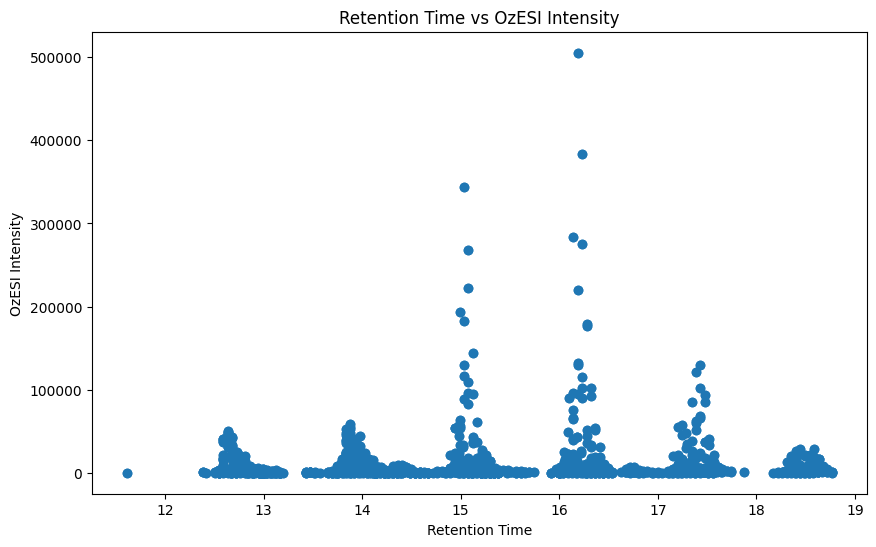

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Retention_Time'], clustered_data['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [88]:
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion','db'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data
complete_df = clustered_data.copy()  # Create a copy of the clustered_data DataFrame
#print transition 870.8 -> 788.8
complete_df

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group
415,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0
489,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0
756,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0
830,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1
...,...,...,...,...,...,...,...,...,...,...
6147,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46
6148,874.8,657.6,17.147767,575.120056,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46
6198,874.8,657.6,17.192167,1078.560059,12012023_FAD131_M1_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46
6215,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46


Area and RT range

In [89]:
# complete_df = clustered_data.copy()  # Create a copy of the clustered_data DataFrame
# Summing up OzESI_Intensity for each combination of Sample_ID, Parent_Ion, Product_Ion, and Cluster_Label
complete_df['Area'] = complete_df.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['OzESI_Intensity'].transform('sum')

#Retenion time range

# Calculate the minimum and maximum Retention_Time for each group
min_rt = complete_df.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['Retention_Time'].transform('min')
max_rt = complete_df.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['Retention_Time'].transform('max')

# Calculate the absolute difference and add it to the dataframe as 'Area_RT'
complete_df['Area_RT'] = abs(max_rt - min_rt)

# complete_df.to_excel('canola_OzON_areaValidation.xlsx')
#print unique Area_RT values
complete_df.to_excel('FF_check_area_liver2.xlsx')

complete_df  # Display the updated dataframe

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group,Area,Area_RT
415,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,1634.280151,0.000000
489,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,2253.800049,0.000000
756,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,1634.280151,0.000000
830,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,2253.800049,0.000000
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
...,...,...,...,...,...,...,...,...,...,...,...,...
6147,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417
6148,874.8,657.6,17.147767,575.120056,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417
6198,874.8,657.6,17.192167,1078.560059,12012023_FAD131_M1_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2157.120117,0.000000
6215,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417


Plotting to confirm clusters

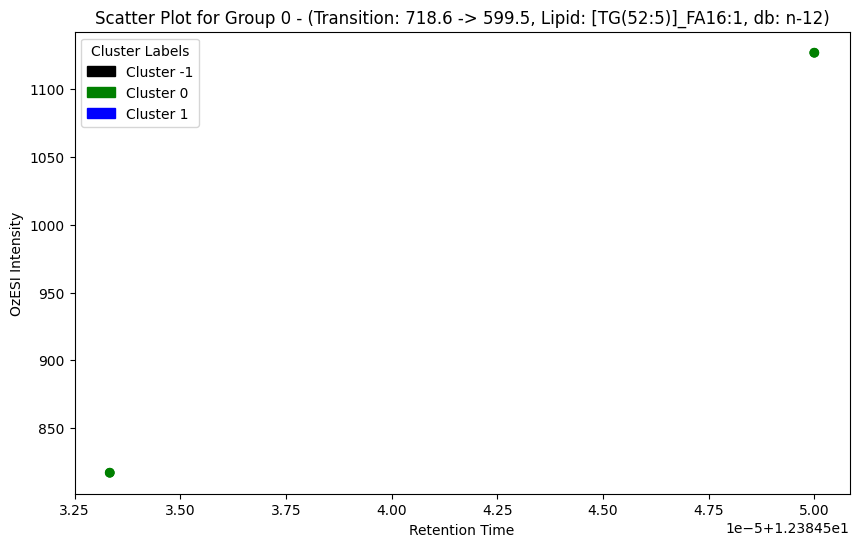

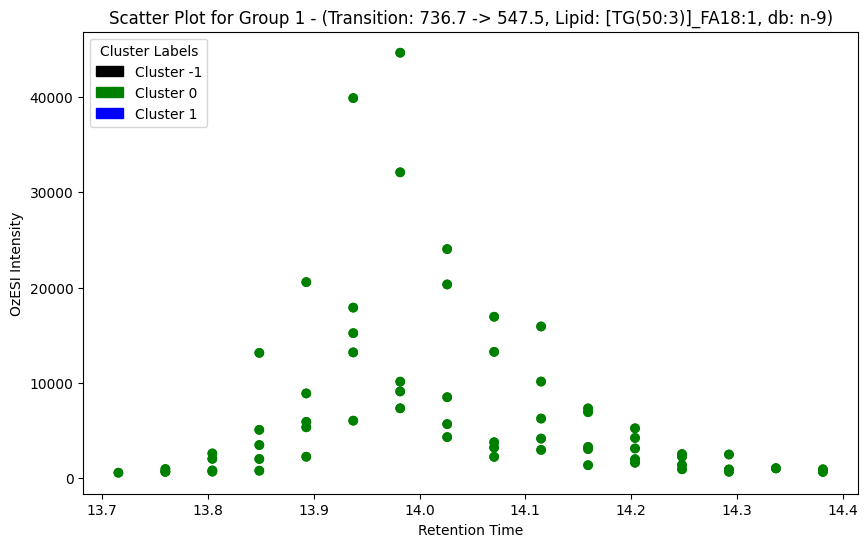

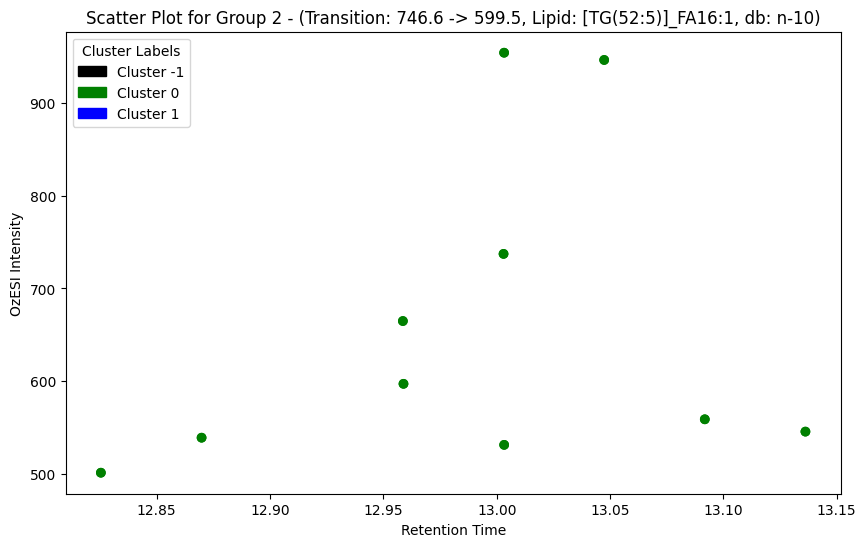

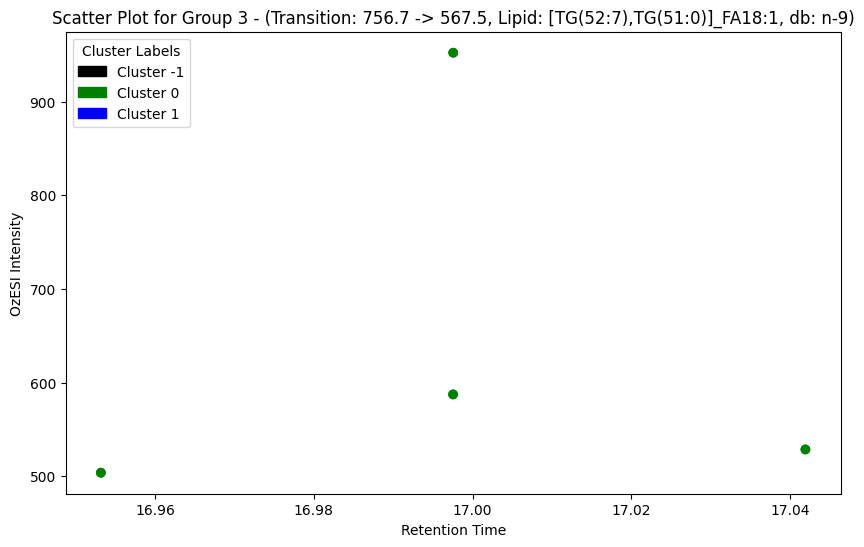

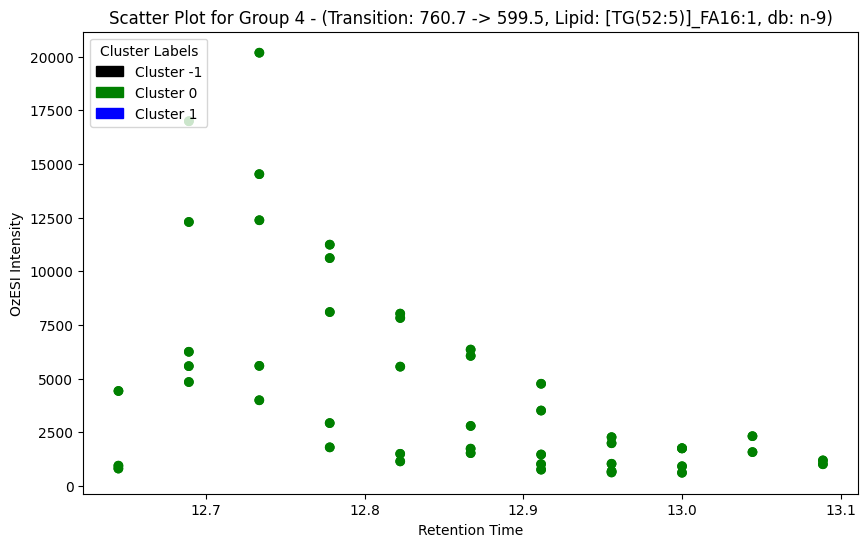

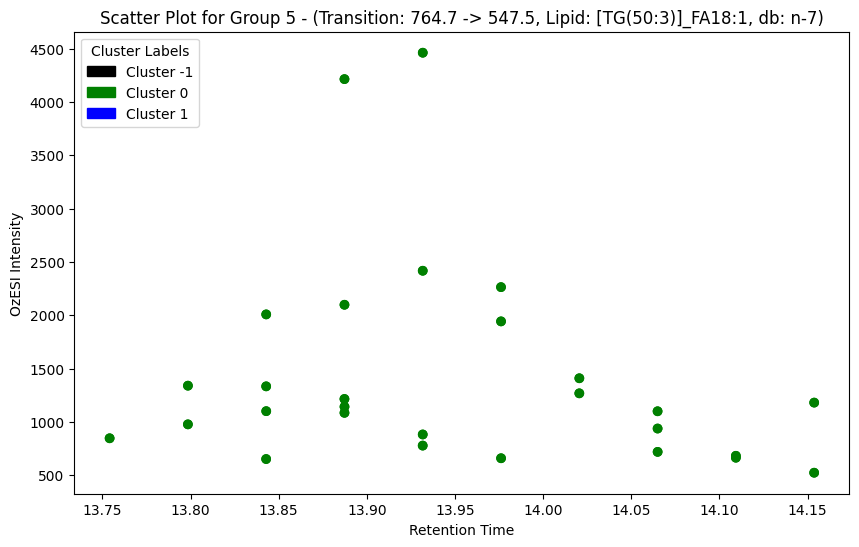

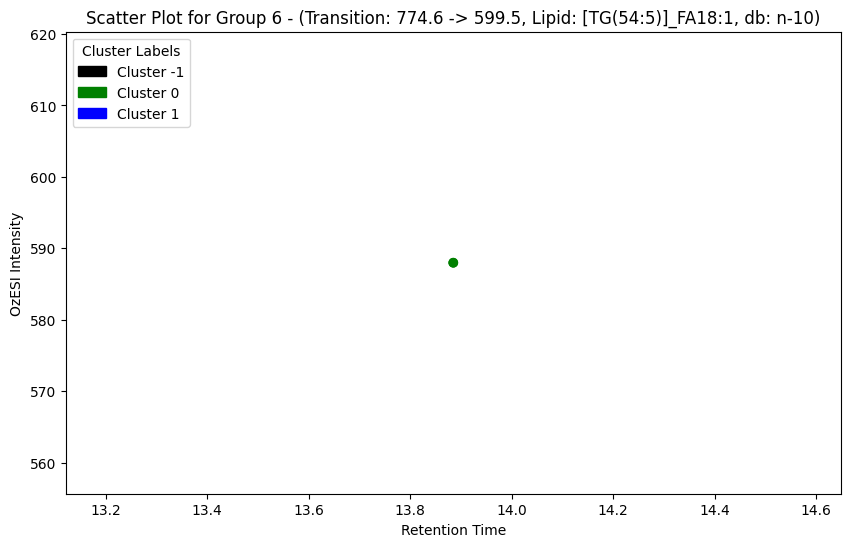

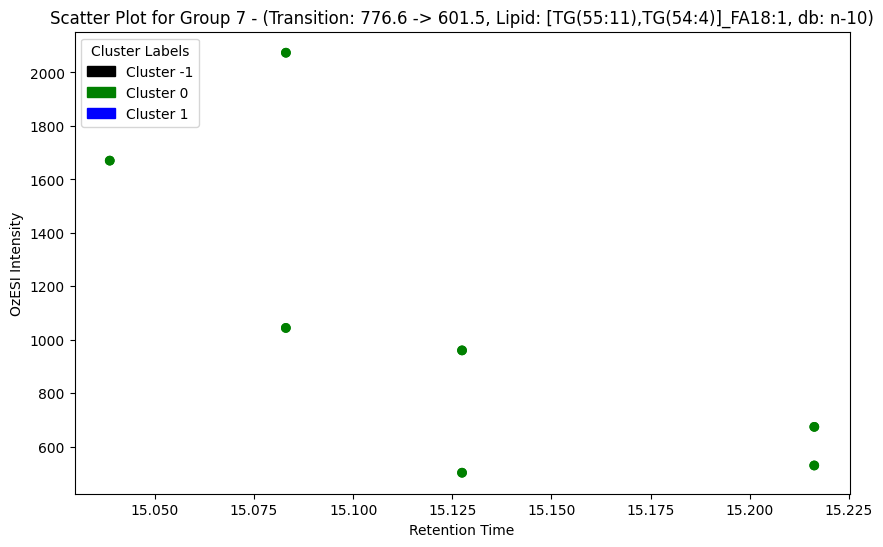

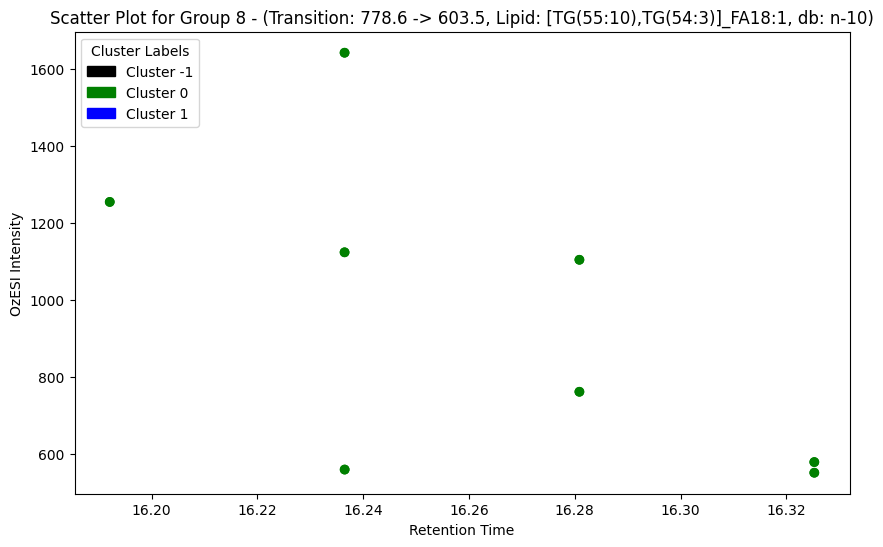

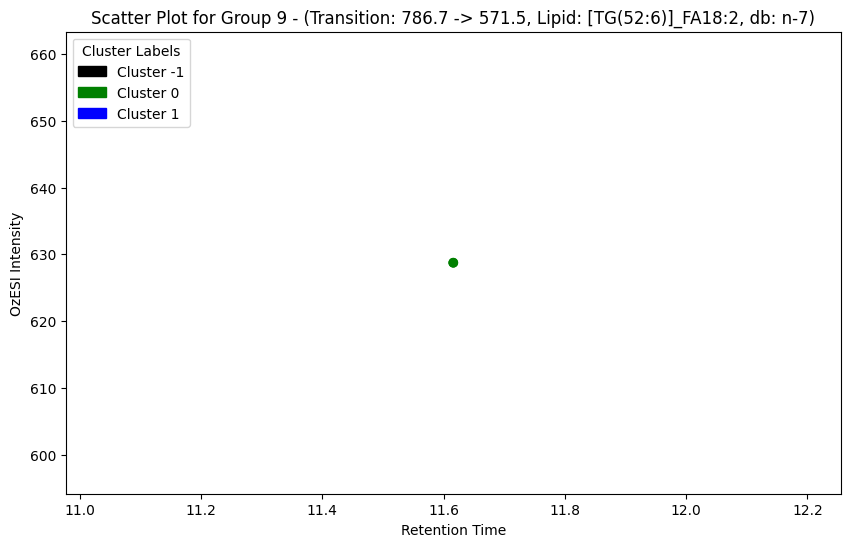

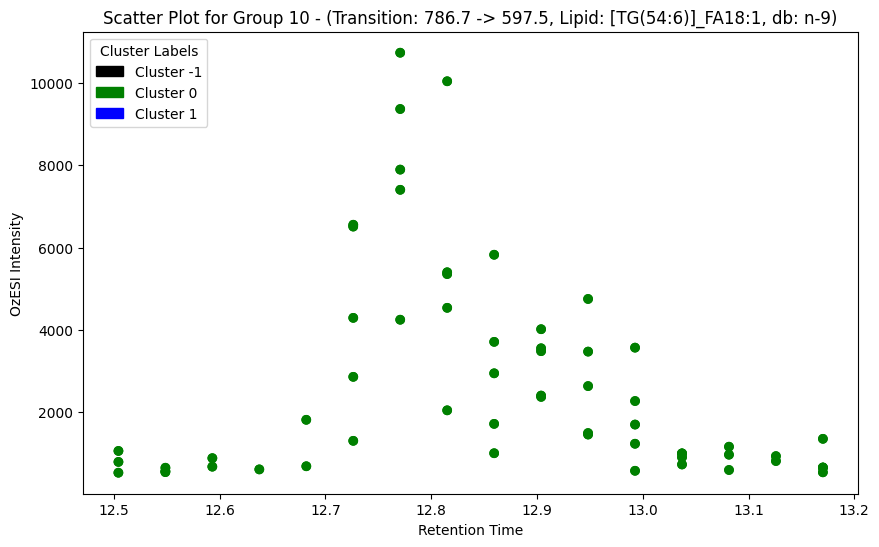

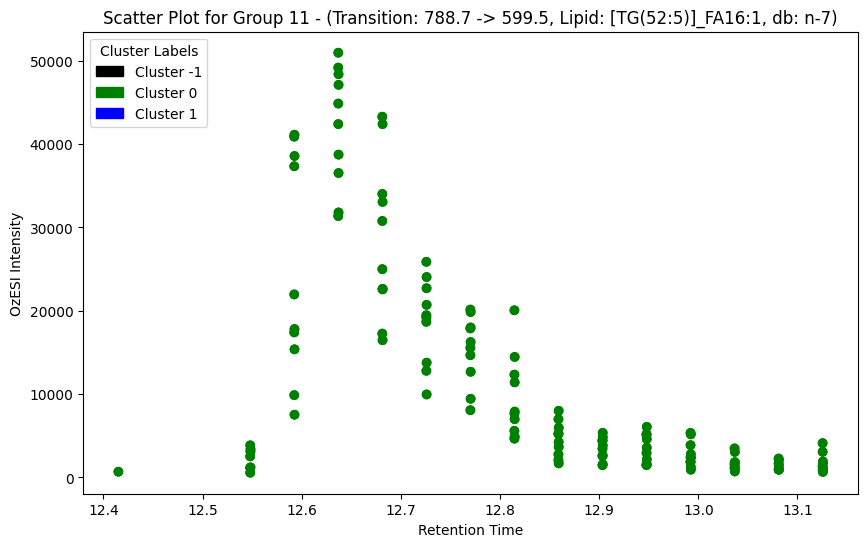

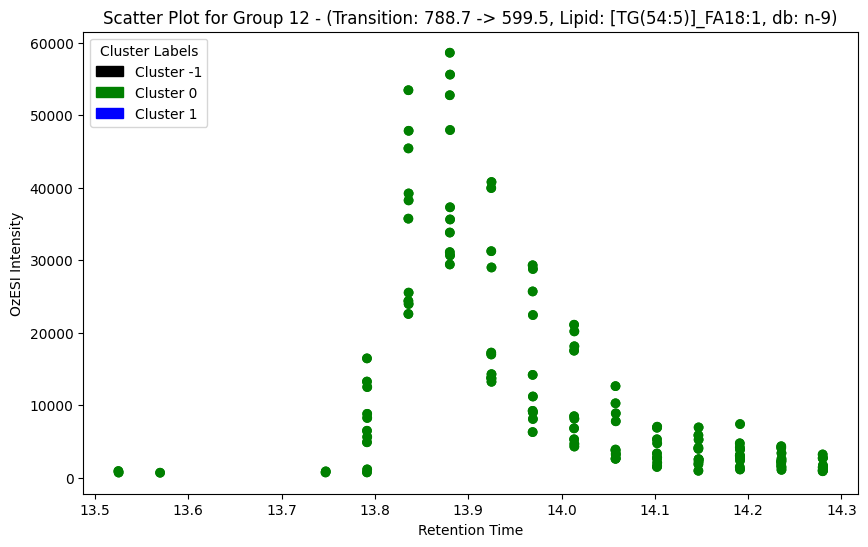

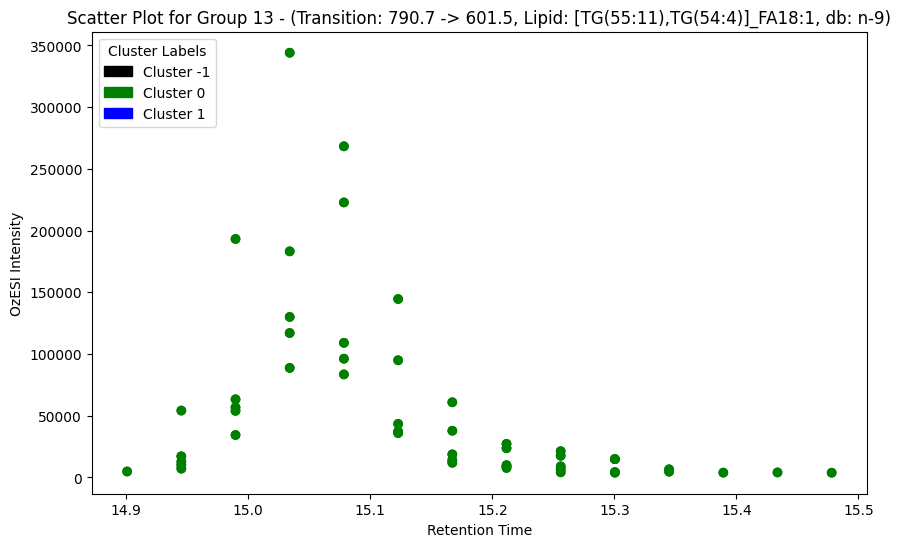

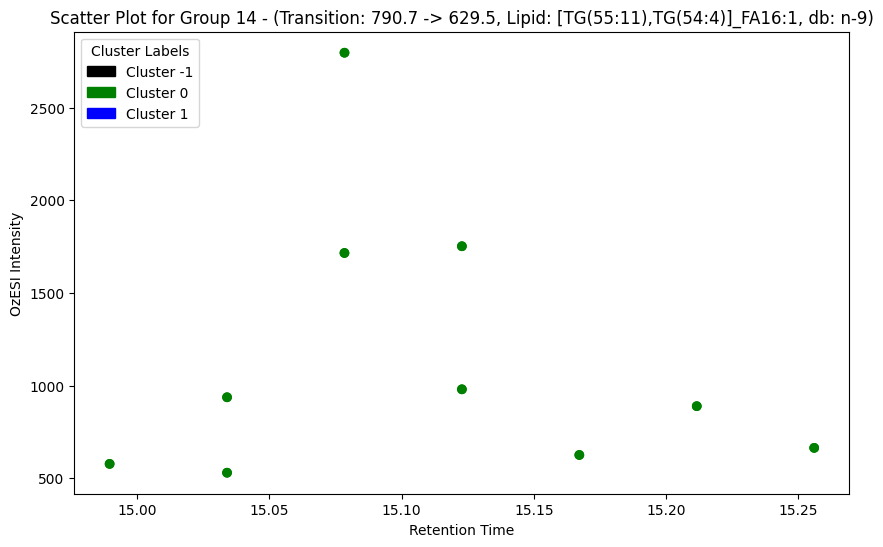

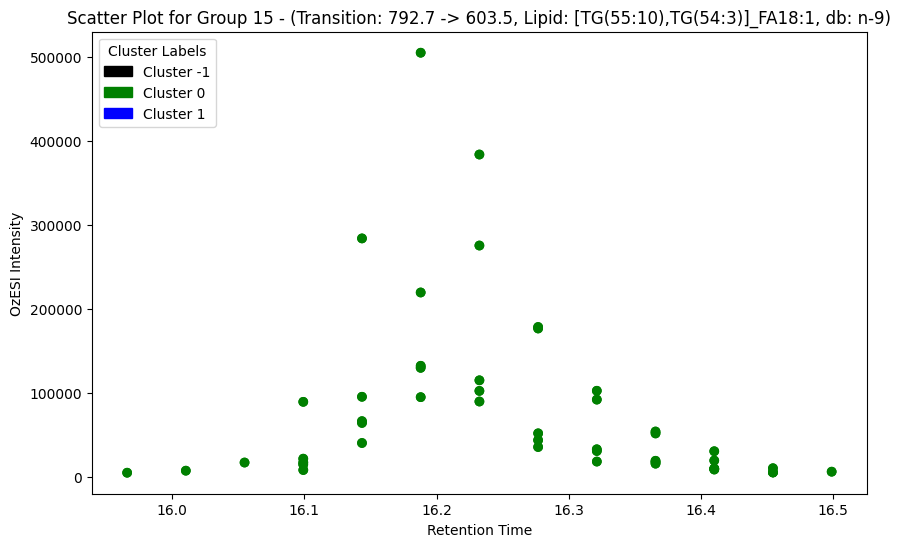

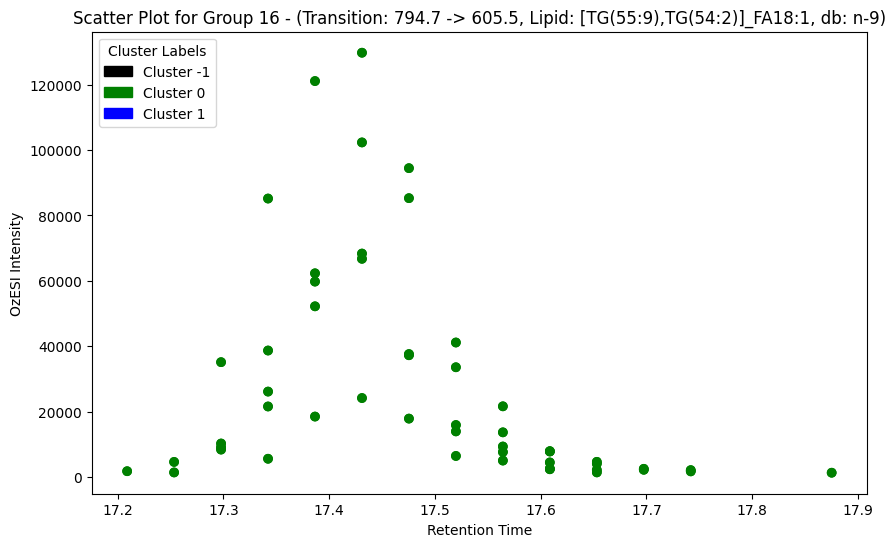

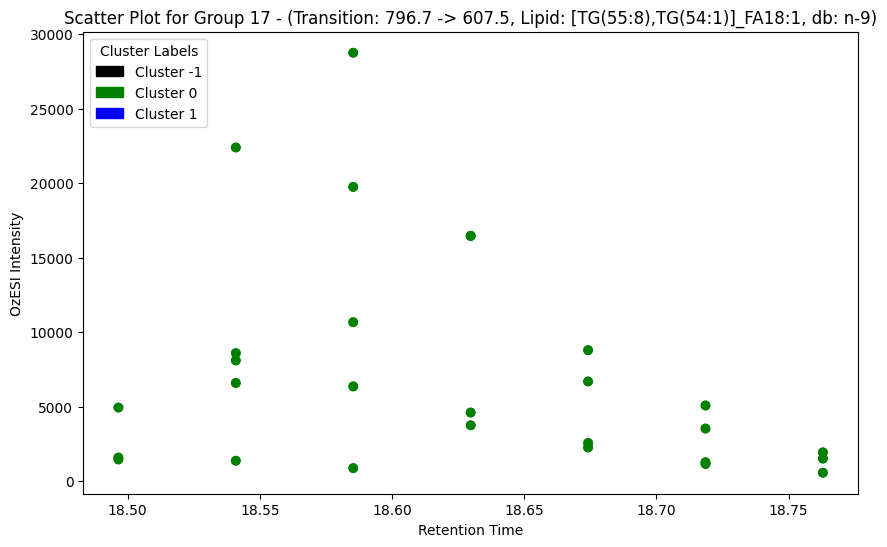

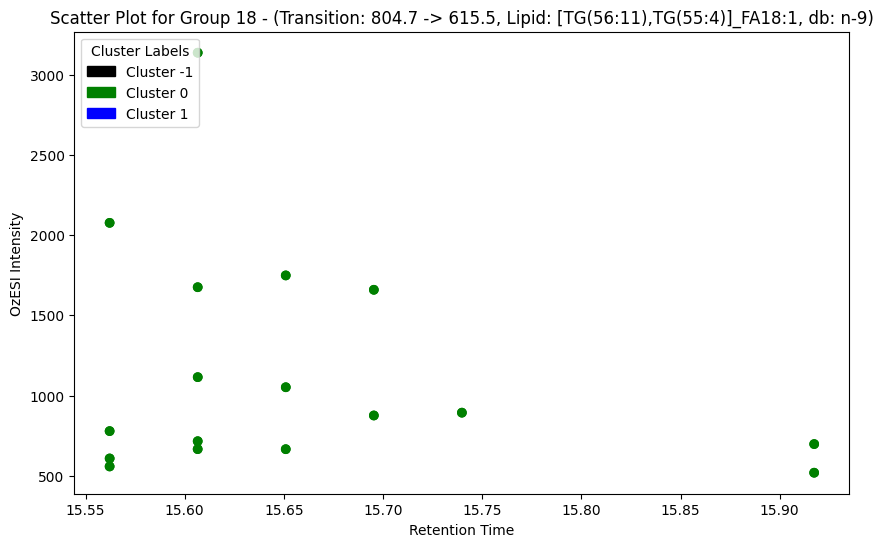

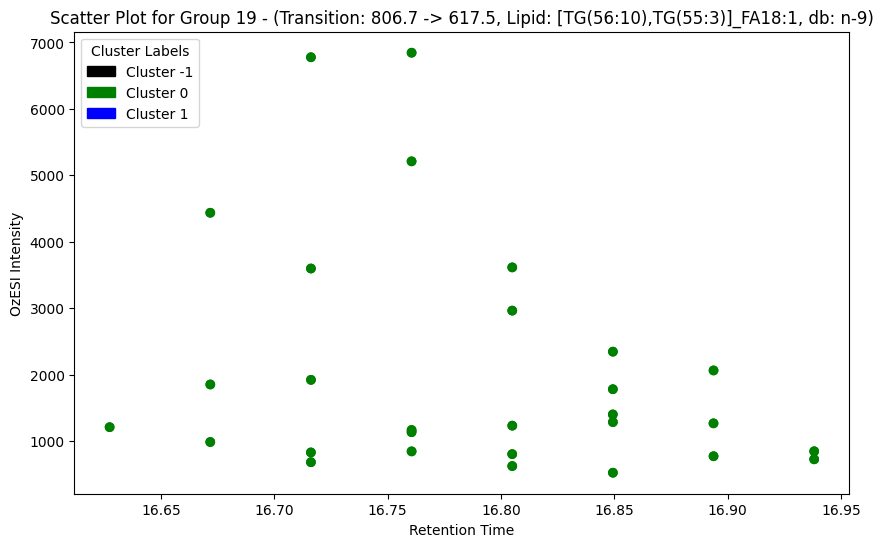

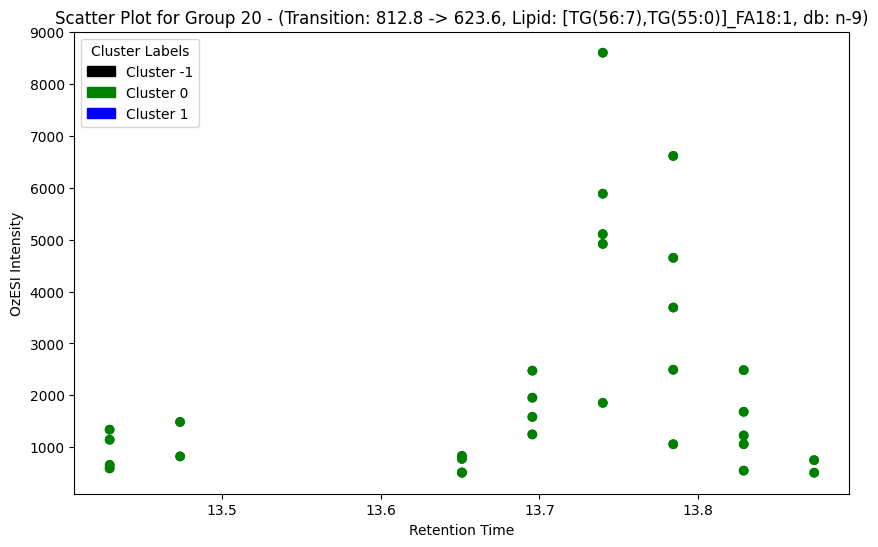

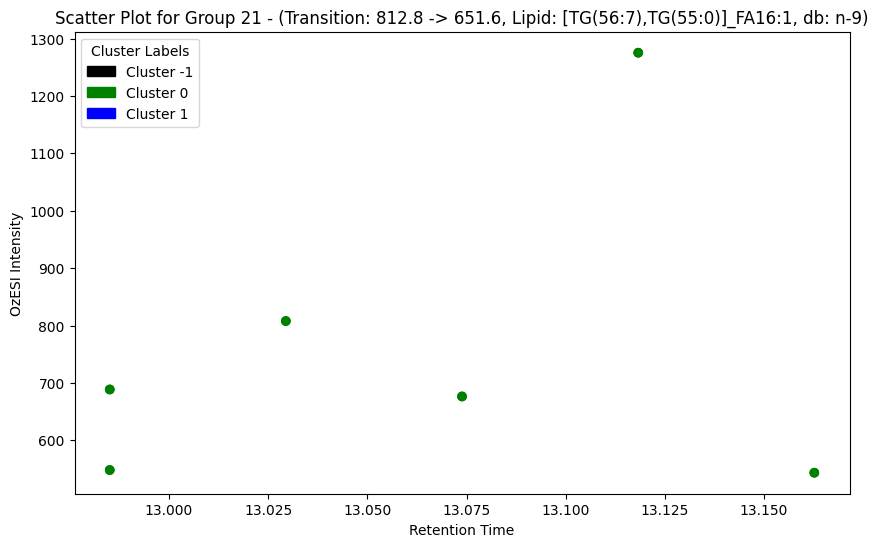

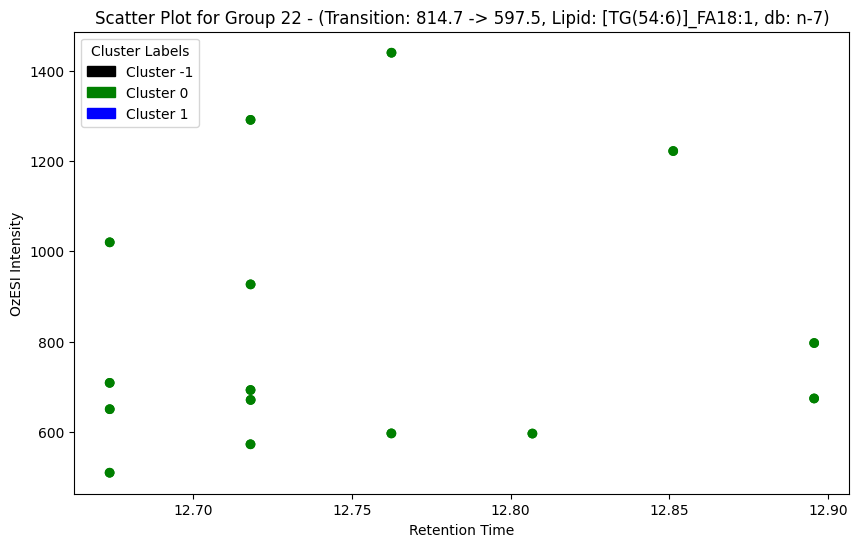

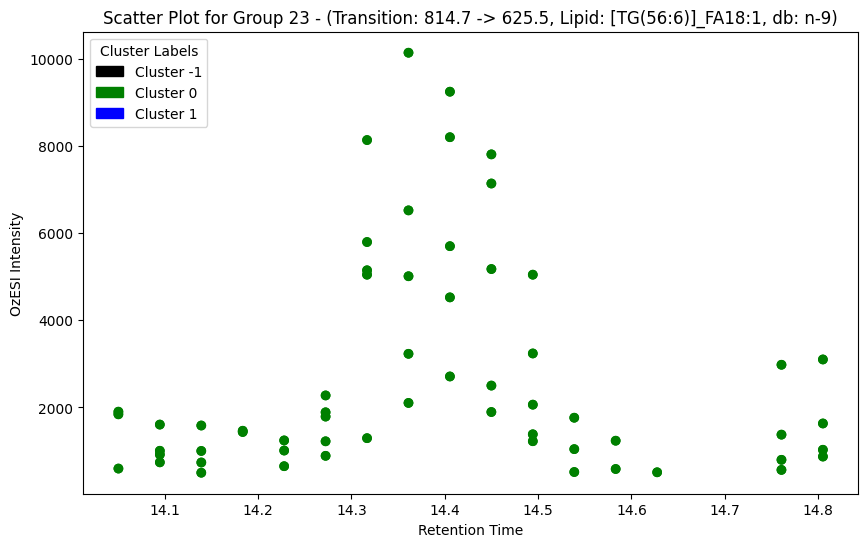

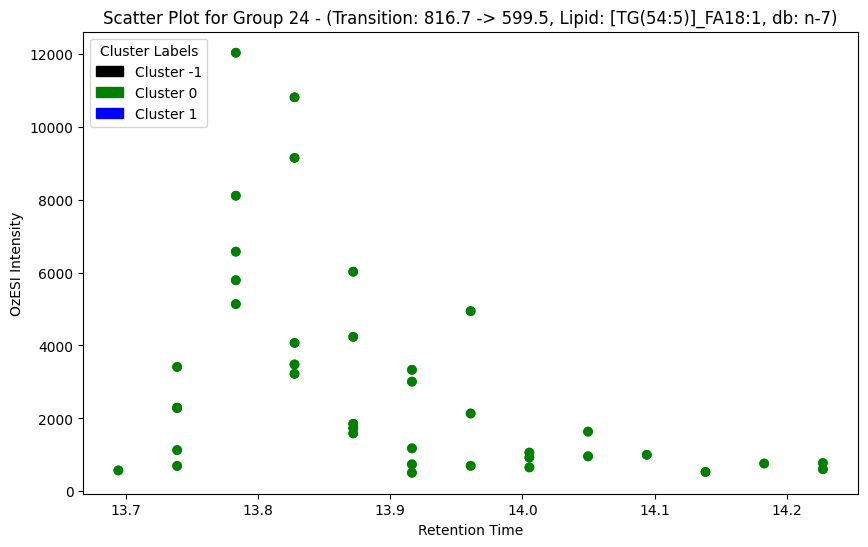

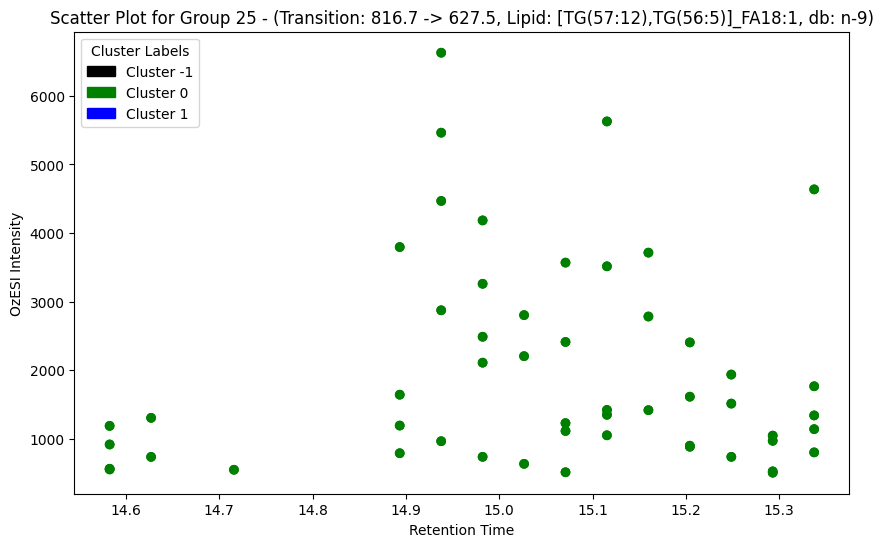

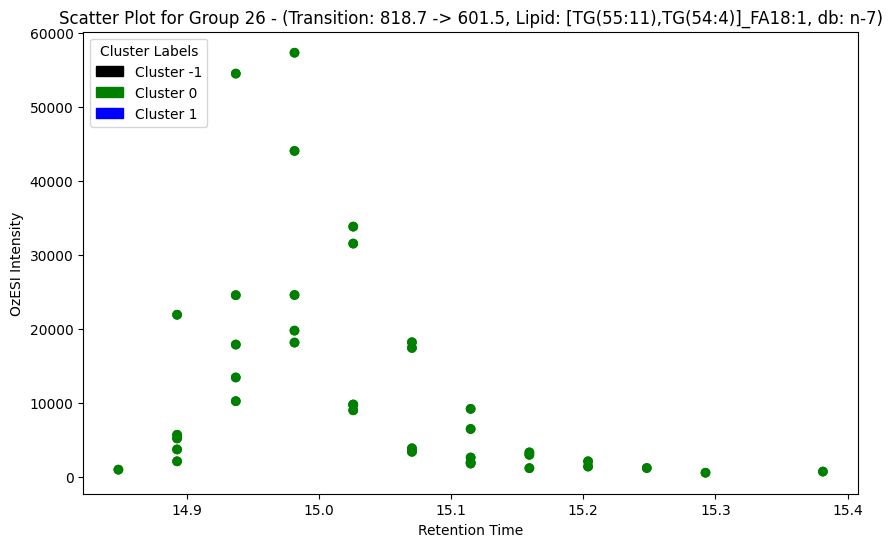

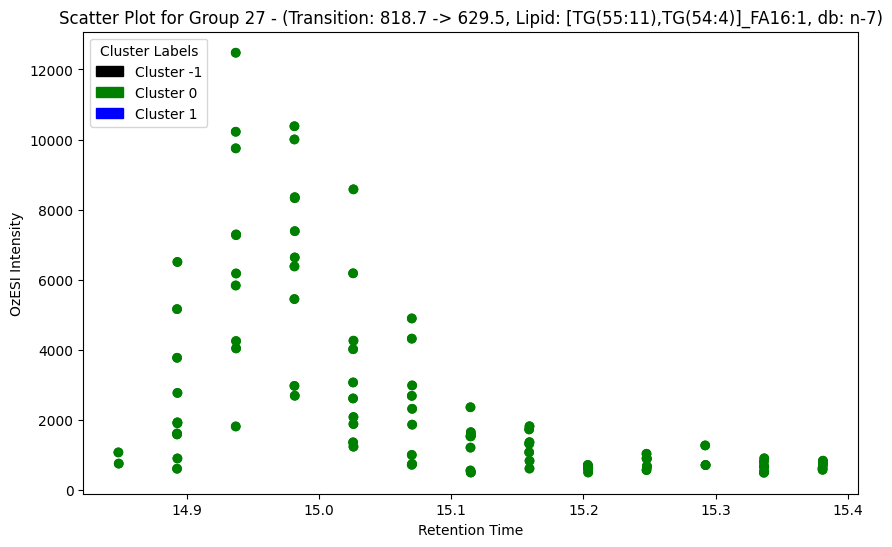

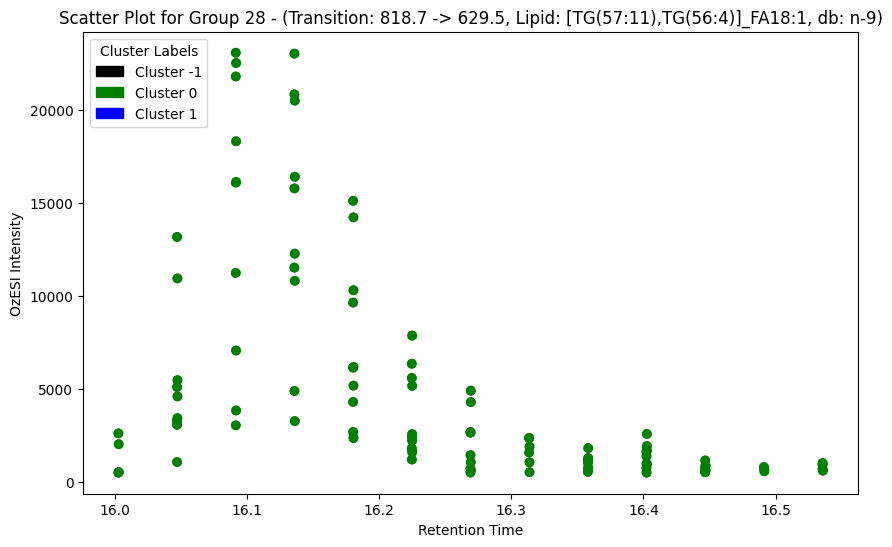

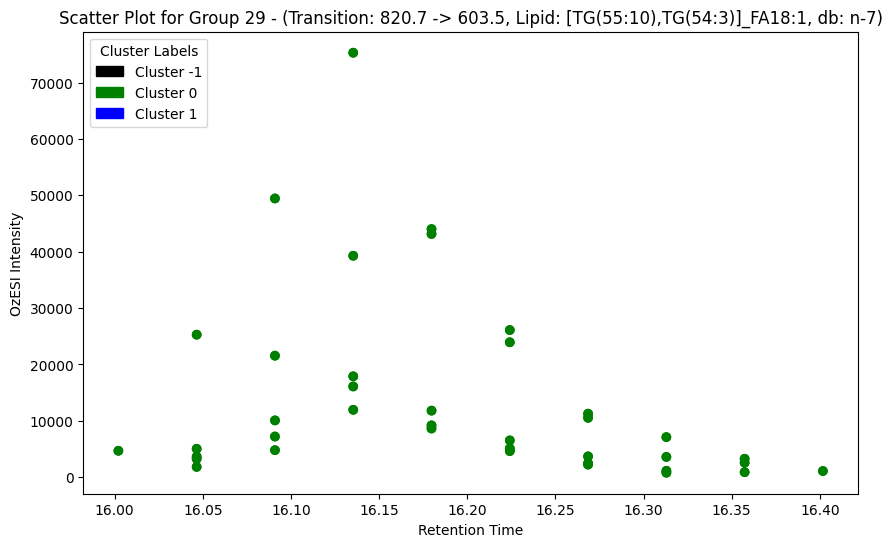

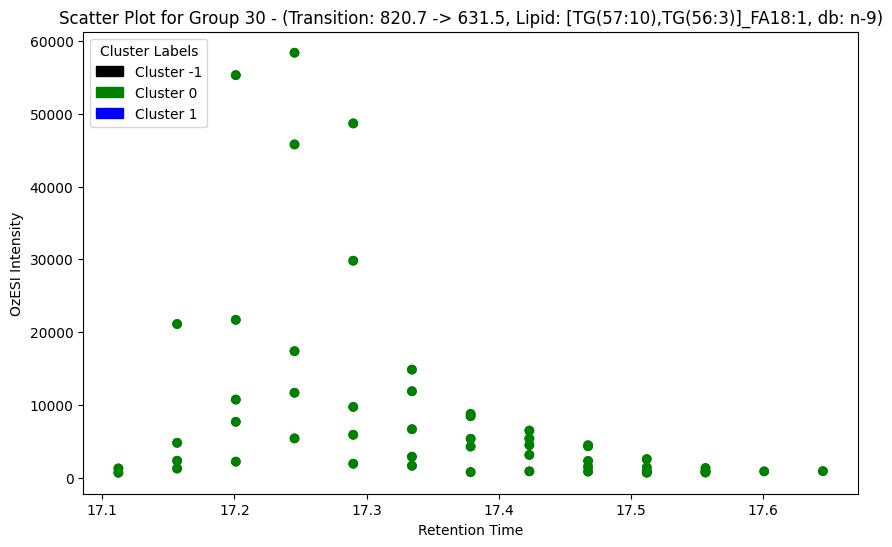

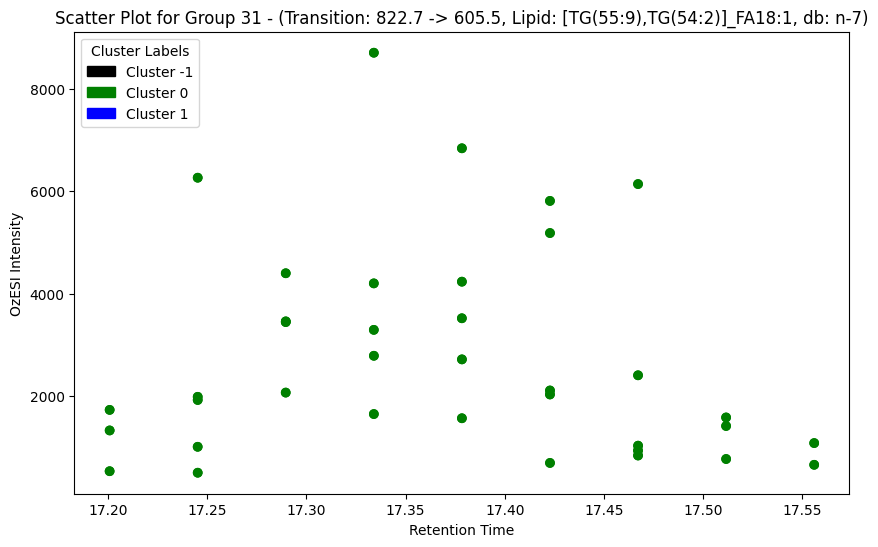

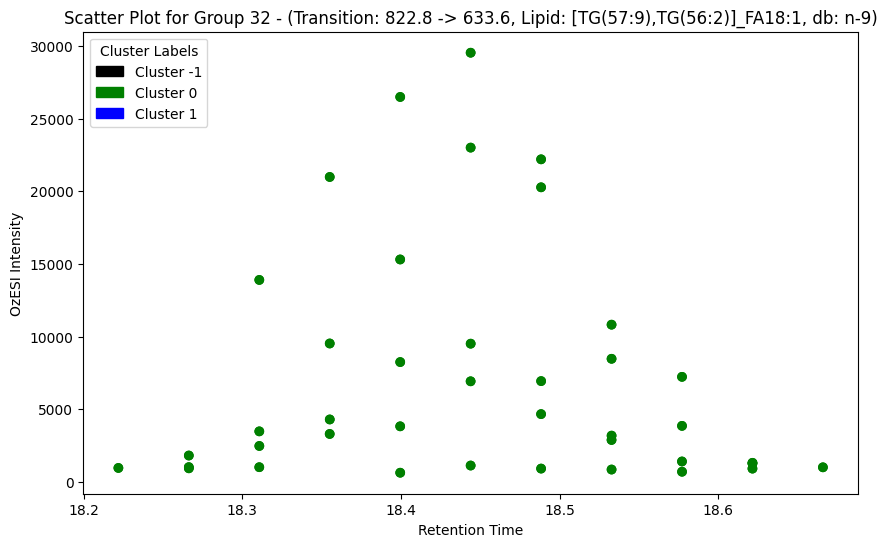

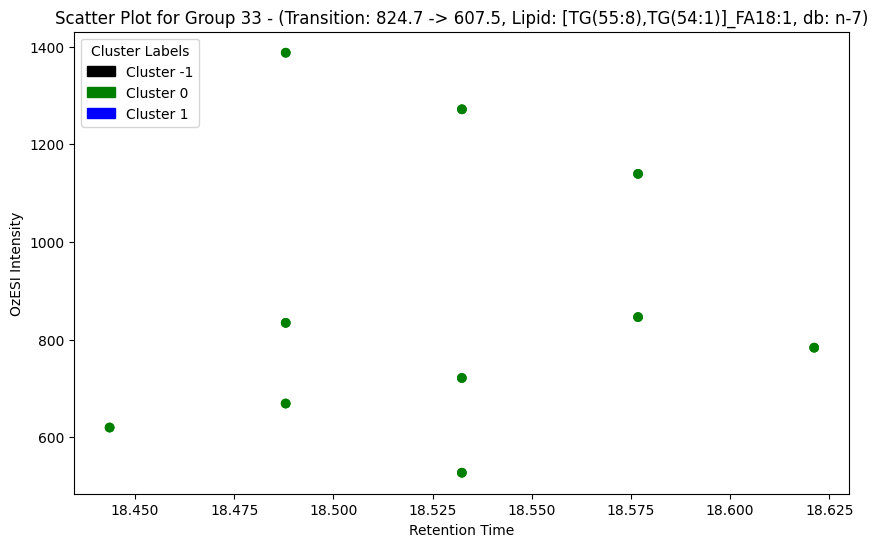

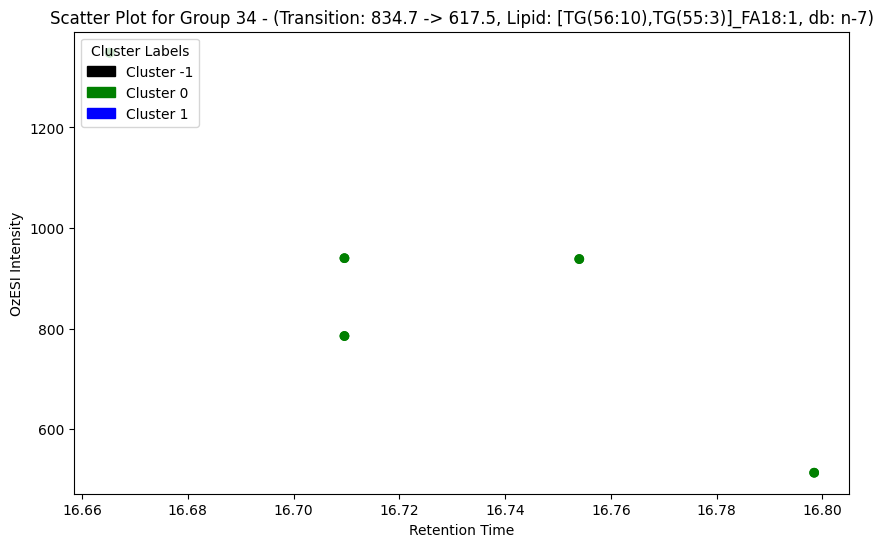

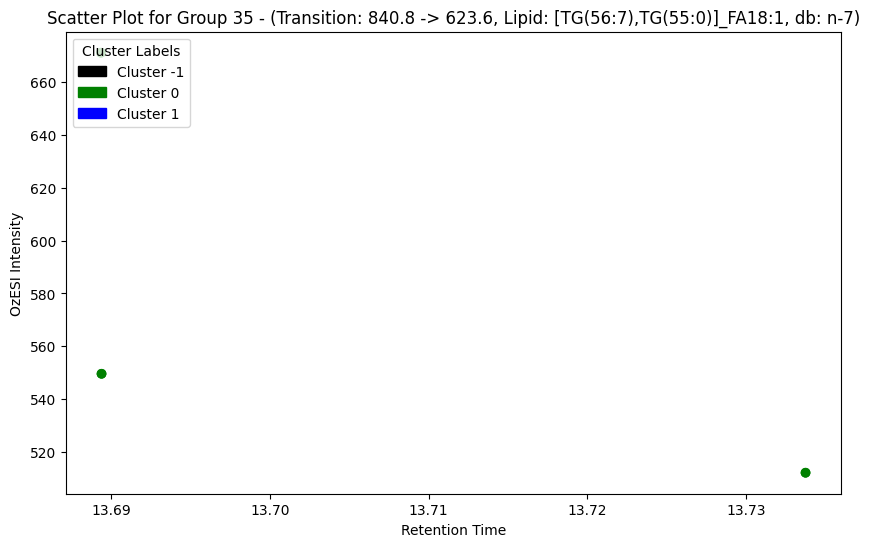

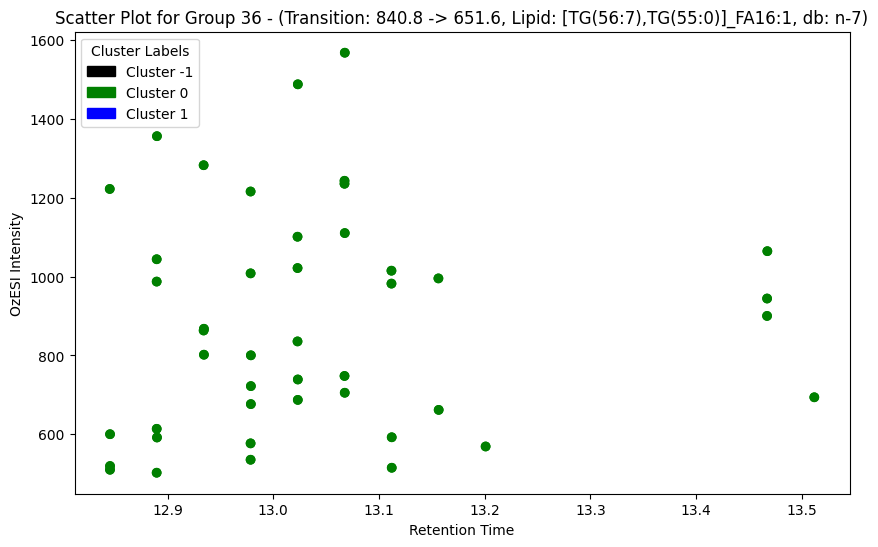

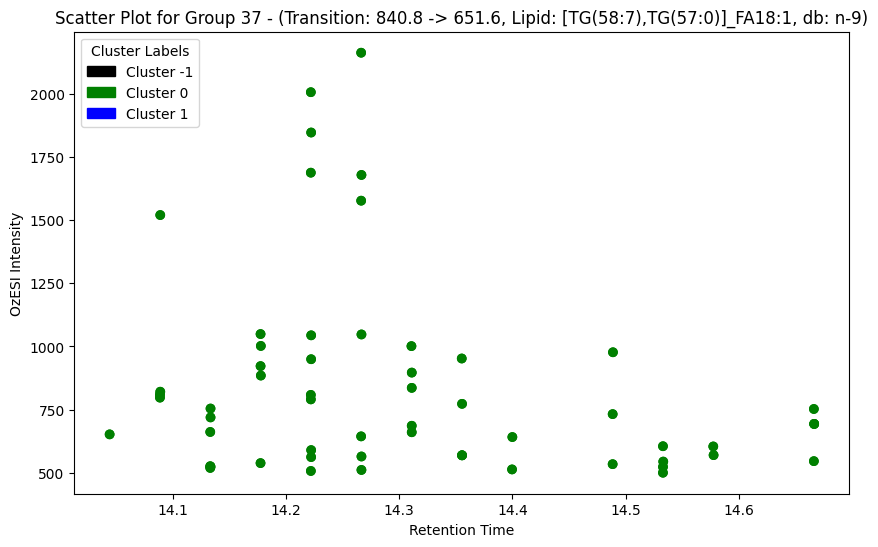

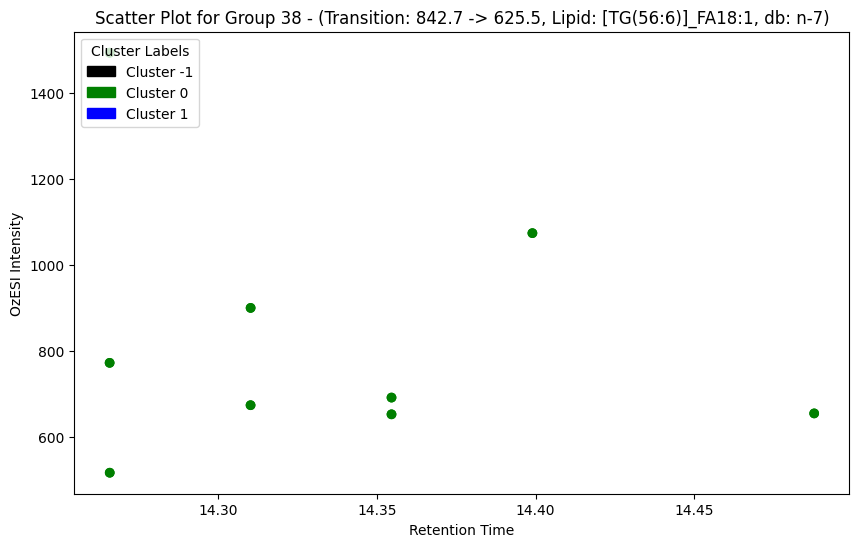

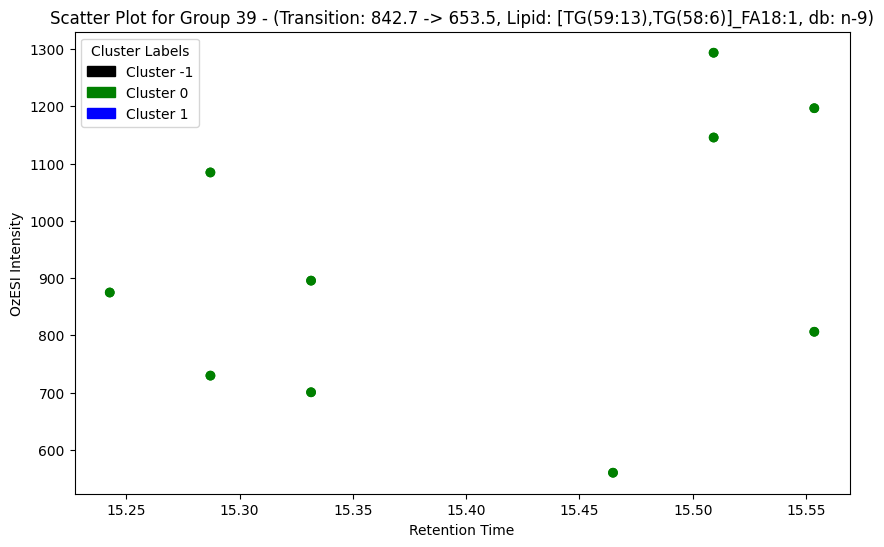

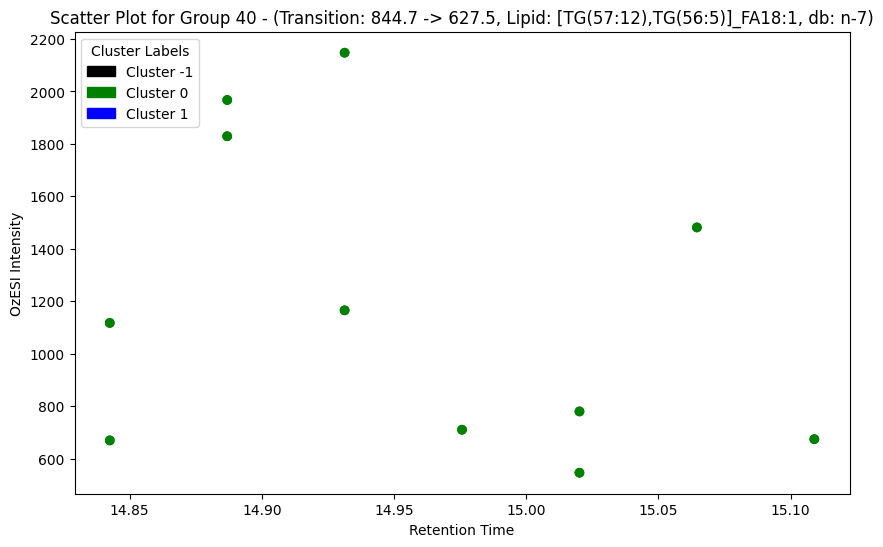

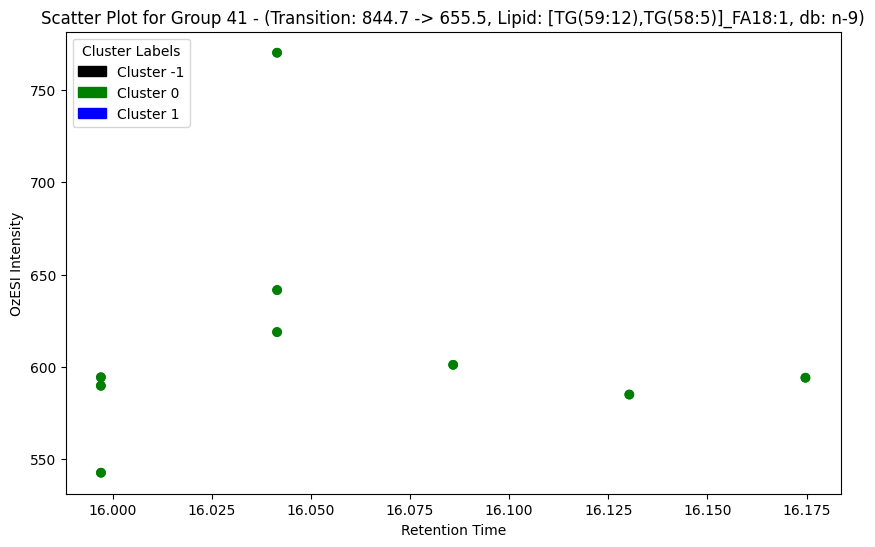

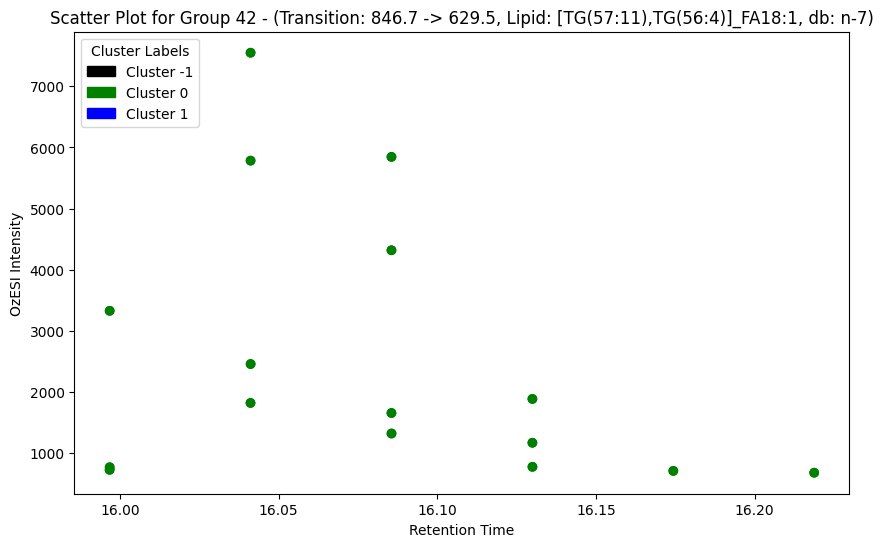

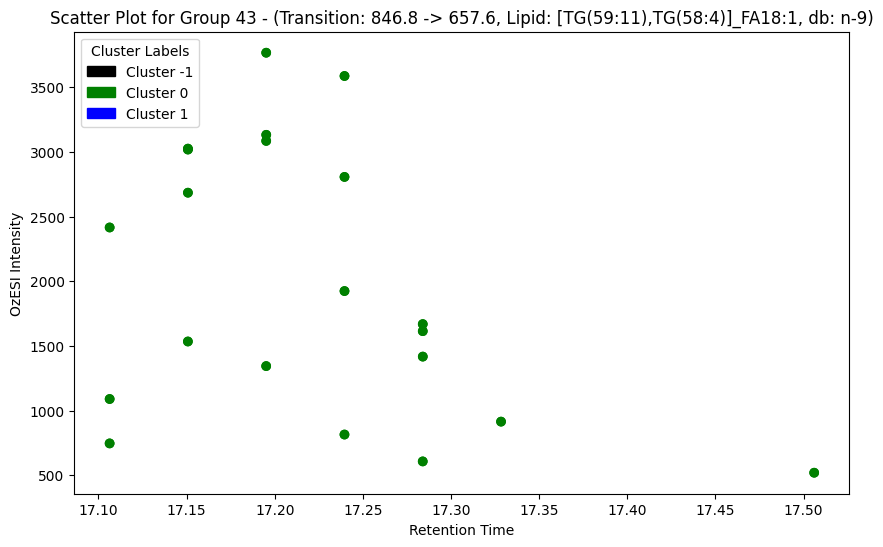

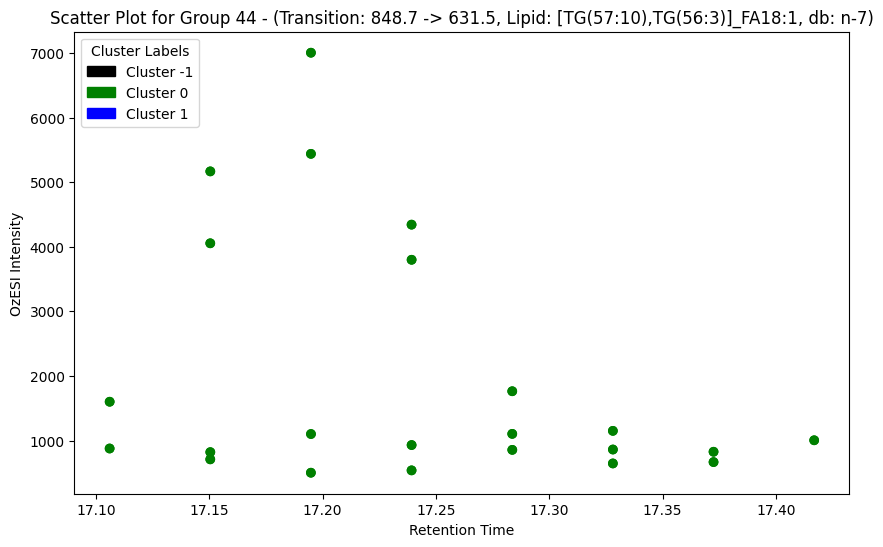

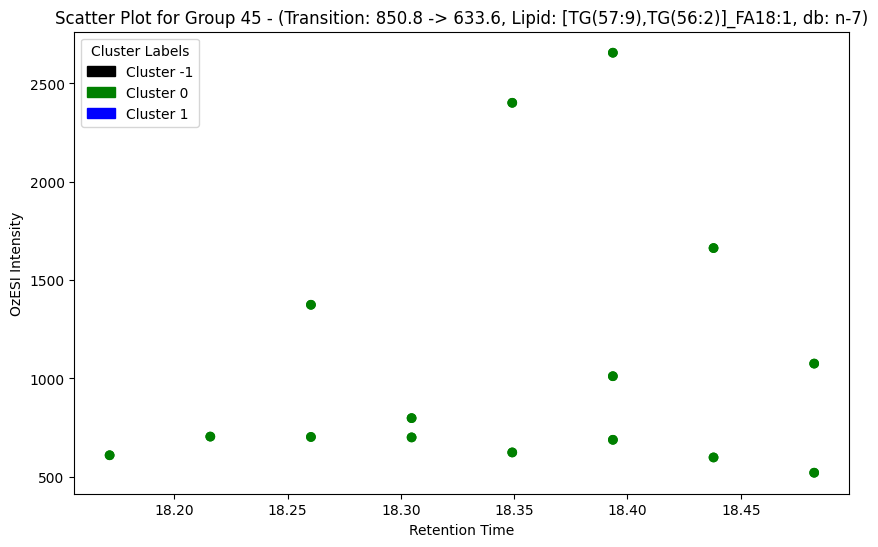

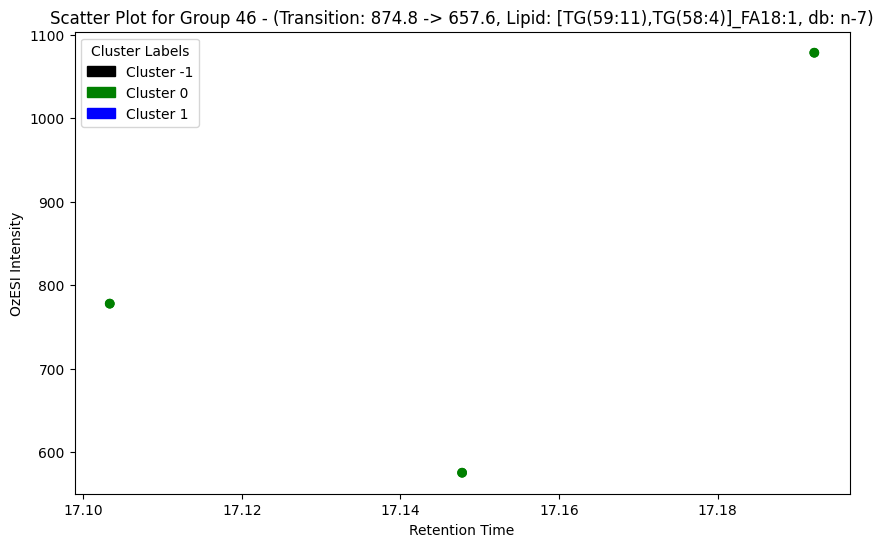

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

# Define custom colors for the clusters add up to 10 clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# Get unique Group values from complete_df
unique_groups = complete_df['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = complete_df[complete_df['Group'] == group]
    colors = group_filtered_data['Cluster_Label'].map(color_map)

    # Extract the corresponding Transition, Lipid Name, and db value for the group
    transition_value = group_filtered_data['Transition'].iloc[0]
    lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
    db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

    # Create a legend for the plot
    patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
    plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
    # # Uncomment the following lines if you want to save the plot
    # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
    # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

    # Show the plot
    plt.show()


OzESI double bonds adding

For Loops FOR LOOOOPS

In [91]:
# # Filter retention time from df_OzESI_matched 
# Oz1 = complete_df.copy()
# # Insert a column named 'Lipid' at the first index
# Oz1.insert(0, 'Lipid', '')
# Oz1.insert(8,'db_pos', '')
# # Oz1

# import pandas as pd

# # # Function to check if a value is within a specified tolerance
# def within_tolerance(val1, val2, tolerance):
#     return abs(val1 - val2) <= tolerance

# # Define the list of positions
# db_pos_list = [7, 9, 10, 12]
# columns = [
#     "Lipid"
#     "Parent_Ion",
#     "Product_Ion",
#     "Retention_Time",
#     "OzESI_Intensity",
#     "Sample_ID",
#     "Transition",
#     "Cluster_Label",
# ]

# # Create a new DataFrame with the specified columns
# Oz1b= pd.DataFrame(columns=columns)

# ### 3rd try
# # Iterate through Oz1 DataFrame
# for index, oz_row in Oz1.iterrows():
#     # Initialize variables to accumulate matches
#     matched_lipids = []
#     db_pos_matches = []

#     # For each n-# column in db_pos_list
#     for n in db_pos_list:
#         n_column = f'n-{n}'

#         # Find matches in db_pos_df
#         matches = df_db_pos[
#             within_tolerance(df_db_pos['Product_Ion'], oz_row['Product_Ion'], 0.3) &
#             within_tolerance(df_db_pos[n_column], oz_row['Parent_Ion'], 0.3) &
#             within_tolerance(df_db_pos['Retention_Time'], oz_row['Retention_Time'], 0.2)
#         ]

#         # Accumulate all matched lipids and db_pos values
#         for _, match_row in matches.iterrows():
#             matched_lipids.append(match_row['Lipid'])
#             db_pos_matches.append(n_column)

#     new_row = oz_row.copy()
#     if matched_lipids:
#         new_row['Lipid'] = ', '.join(matched_lipids)
#     if db_pos_matches:
#         new_row['db_pos'] = ', '.join(db_pos_matches)
#     Oz1b = Oz1b.append(new_row, ignore_index=True)

# # Oz1 now contains the updated Lipid and db_pos information for all matches



# Oz1b




In [92]:
Oz1b = complete_df.copy()

In [93]:
Oz1b



,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group,Area,Area_RT
415,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,1634.280151,0.000000
489,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,2253.800049,0.000000
756,718.6,599.5,12.384533,817.140076,12012023_FAD131_M1_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,1634.280151,0.000000
830,718.6,599.5,12.384550,1126.900024,12012023_FAD131_M2_5xFAD_liver_O3on_01,718.6 -> 599.5,n-12,[TG(52:5)]_FA16:1,0,0,2253.800049,0.000000
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
...,...,...,...,...,...,...,...,...,...,...,...,...
6147,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417
6148,874.8,657.6,17.147767,575.120056,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417
6198,874.8,657.6,17.192167,1078.560059,12012023_FAD131_M1_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2157.120117,0.000000
6215,874.8,657.6,17.103350,777.780029,12012023_FAD131_M2_5xFAD_liver_O3on_01,874.8 -> 657.6,n-7,"[TG(59:11),TG(58:4)]_FA18:1",0,46,2705.800171,0.044417


In [94]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # save_dir = 'Projects/canola/plots/validation_oz/'

# # Define custom colors for the clusters add up to 10 clusters
# color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# # color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# # Get unique Group values from Oz1b
# unique_groups = Oz1b['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group in Oz1b
#     group_filtered_data = Oz1b[Oz1b['Group'] == group]
#     colors = group_filtered_data['Cluster_Label'].map(color_map)

#     # Extract the corresponding Transition and Lipid Name for the group
#     # Assuming that all rows in a group have the same Transition and Lipid Name
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - {lipid_name} (Transition: {transition_value})')

#     # Create a legend for the plot
#     patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#     plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
#     # # Save the plot as a PNG file in the specified directory
#     # filename = f'Group_{group}_{lipid_name}_Transition_{transition_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


In [95]:
Oz1c = Oz1b.copy()
# Assuming your DataFrame is named Oz1c
Oz1c = Oz1c[Oz1c['db'] != '']
Oz1c

# Define the transitions for the specific lipids
transition_1 = (764.7, 547.5)  # Corresponding to [TG(50:3)]_FA18:1 first lipid
transition_2 = (736.7, 547.5)  # Corresponding to [TG(50:3)]_FA18:1 second lipid

# Filter the DataFrame for these two transitions
filtered_transitions = Oz1c[((Oz1c['Parent_Ion'] == transition_1[0]) & (Oz1c['Product_Ion'] == transition_1[1])) |
                            ((Oz1c['Parent_Ion'] == transition_2[0]) & (Oz1c['Product_Ion'] == transition_2[1]))]

# Display the first few rows of the filtered DataFrame
filtered_transitions




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group,Area,Area_RT
0,736.7,547.5,13.715233,585.820068,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
1,736.7,547.5,13.759633,689.460022,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
2,736.7,547.5,13.804050,2042.220093,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
3,736.7,547.5,13.848450,5081.240234,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
4,736.7,547.5,13.892850,5348.640137,12012023_DOD73_M2_5xFAD_liver_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,1,116135.127197,0.666100
...,...,...,...,...,...,...,...,...,...,...,...,...
300,764.7,547.5,13.931683,881.300049,12012023_FAD131_M4_5xFAD_liver_O3on_01,764.7 -> 547.5,n-7,[TG(50:3)]_FA18:1,0,5,3931.200195,0.044400
329,764.7,547.5,13.842900,1100.060059,12012023_FAD173_M1_5xFAD_liver_O3on_01,764.7 -> 547.5,n-7,[TG(50:3)]_FA18:1,0,5,7236.040405,0.222033
330,764.7,547.5,13.887300,1141.540039,12012023_FAD173_M1_5xFAD_liver_O3on_01,764.7 -> 547.5,n-7,[TG(50:3)]_FA18:1,0,5,7236.040405,0.222033
331,764.7,547.5,13.976117,658.360046,12012023_FAD173_M1_5xFAD_liver_O3on_01,764.7 -> 547.5,n-7,[TG(50:3)]_FA18:1,0,5,7236.040405,0.222033


In [96]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first


Oz2 = Oz1c.copy()
print(len(Oz2))
# # Group by 'Lipid' and 'db_pos', then find the index of the row with the highest 'OzESI_Intensity' in each group
# indices_of_max_intensity = Oz2.groupby(['Lipid','Sample_ID', 'db'])['OzESI_Intensity'].idxmax()

# # Use these indices to filter your DataFrame
# Oz2_filtered = Oz2.loc[indices_of_max_intensity]
# print(len(Oz2_filtered))
# Oz2_sorted = Oz2_filtered.sort_values(by='OzESI_Intensity', ascending=False)
#sort Oz2 by Sample_ID, then Lipid then db_pos
Oz2_validate = Oz2.groupby(['Lipid', 'Sample_ID', 'db']).first().reset_index()



#round the retention time to 2 decimal places
Oz2_validate['Retention_Time'] = Oz2_validate['Retention_Time'].round(2)
#round intensity to 0 decimal places
Oz2_validate['OzESI_Intensity'] = Oz2_validate['OzESI_Intensity'].round(0)

# # Define a function to determine the purity based on the Sample_ID
# def determine_purity(sample_id):
#     if "Crude" in sample_id:
#         return "Crude"
#     elif "Degummed" in sample_id:
#         return "Degummed"
#     elif "RBD" in sample_id:
#         return "RBD"
#     else:
#         return "Unknown"
# # Apply the determine_purity function to create the 'Purity' column in Oz2_validate DataFrame
# Oz2_validate['Purity'] = Oz2_validate['Sample_ID'].apply(determine_purity)

# # Displaying the first few rows of Oz2_validate DataFrame for verification
# Oz2_validate.head()

# # Oz2_validate.to_csv('CLAW_Canola_OzON.csv')
# # Oz2_validate.to_excel('CLAW_Canola_OzON.xlsx')

# # sort by Purty, Lipid
# Oz2_validate = Oz2_validate.sort_values(by=['Purity', 'Lipid'], ascending=True)

Oz2_validate

3122


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT
0,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.84,651.0,764.7 -> 547.5,0,5,5284.480469,0.088817
1,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.72,586.0,736.7 -> 547.5,0,1,116135.127197,0.666100
2,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.80,976.0,764.7 -> 547.5,0,5,25280.441406,0.355250
3,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.76,691.0,736.7 -> 547.5,0,1,256426.174072,0.621700
4,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.75,846.0,764.7 -> 547.5,0,5,38038.763428,0.399667
...,...,...,...,...,...,...,...,...,...,...,...,...
184,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.00,543.0,844.7 -> 655.5,0,41,3493.240234,0.133217
185,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.00,594.0,844.7 -> 655.5,0,41,2472.080200,0.044417
186,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.29,1084.0,842.7 -> 653.5,0,39,7769.200562,0.266450
187,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.24,875.0,842.7 -> 653.5,0,39,9344.440674,0.310850


Calculate Area Ratio

In [97]:
# Revised approach to calculate the 'Area_Ratio' column avoiding index issues

# Create a separate DataFrame to store the calculated Area_Ratio values
area_ratio_df = pd.DataFrame(columns=['Lipid', 'Sample_ID', 'Area_Ratio'])
grouped_Oz2 = Oz2_validate.groupby(['Lipid', 'Sample_ID'])

# Iterate over each group and calculate the 'Area_Ratio'
for (lipid, sample_id), group in grouped_Oz2:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        n9_area = group.loc[group['db'] == 'n-9', 'Area'].iloc[0]
        n7_area = group.loc[group['db'] == 'n-7', 'Area'].iloc[0]
        area_ratio = (n9_area / n7_area).round(2) if n7_area != 0 else None
    else:
        area_ratio = None
    
    # Append the calculated ratio to the DataFrame
    area_ratio_df = area_ratio_df.append({
        'Lipid': lipid,
        'Sample_ID': sample_id,
        'Area_Ratio': area_ratio
    }, ignore_index=True)

# Merge the calculated 'Area_Ratio' back into the Oz2_validate DataFrame
Oz2_validate_merged = pd.merge(Oz2_validate, area_ratio_df, on=['Lipid', 'Sample_ID'], how='left')

Oz2_validate_merged.head(20)  # Display the updated DataFrame with the new 'Area_Ratio' column



,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio
0,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.84,651.0,764.7 -> 547.5,0,5,5284.480469,0.088817,21.98
1,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.72,586.0,736.7 -> 547.5,0,1,116135.127197,0.666100,21.98
2,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.80,976.0,764.7 -> 547.5,0,5,25280.441406,0.355250,10.14
3,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.76,691.0,736.7 -> 547.5,0,1,256426.174072,0.621700,10.14
4,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.75,846.0,764.7 -> 547.5,0,5,38038.763428,0.399667,10.07
5,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.76,972.0,736.7 -> 547.5,0,1,383000.512451,0.621683,10.07
6,[TG(50:3)]_FA18:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.89,1084.0,764.7 -> 547.5,0,5,3931.200195,0.044400,15.11
7,[TG(50:3)]_FA18:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.80,702.0,736.7 -> 547.5,0,1,59388.083862,0.399650,15.11
8,[TG(50:3)]_FA18:1,12012023_FAD173_M1_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.84,1100.0,764.7 -> 547.5,0,5,7236.040405,0.222033,16.92
9,[TG(50:3)]_FA18:1,12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.80,823.0,736.7 -> 547.5,0,1,122418.848999,0.488467,16.92


In [98]:

# # Grouping by Lipid and Purity and checking for db_pos = n-7 and n-9
# result_with_retention_time = {}
# for (lipid, purity), group in Oz2_validate_merged.groupby(['Lipid']):
#     n7_row = group[group['db'] == 'n-7']
#     n9_row = group[group['db'] == 'n-9']

#     if not n7_row.empty and not n9_row.empty:
#         n7_intensity = n7_row.iloc[0]['OzESI_Intensity']
#         n9_intensity = n9_row.iloc[0]['OzESI_Intensity']
#         ratio = n9_intensity / n7_intensity
#         n7_retention_time = n7_row.iloc[0].get('Retention_Time', 'Not Available')
#         n9_retention_time = n9_row.iloc[0].get('Retention_Time', 'Not Available')
#         result_with_retention_time[(lipid)] = {'Area_Ratio': ratio, 'Retention_Time': n9_retention_time}

# result_with_retention_time
# #sort result dictionary by crude degummend and RBD
# sorted_result = sorted(result_with_retention_time.items(), key=lambda x: x[0][1])
# sorted_result

# # Extracting data from the sorted results
# data_for_df = []
# for (lipid, purity), values in sorted_result:
#     data_for_df.append({
#         "Lipid": lipid,
#         "Area_Ratio": values['Area_Ratio'],
#         "Retention_Time": values['Retention_Time']
#     })

# # Creating a DataFrame
# sorted_results_df = pd.DataFrame(data_for_df)
# #round ratio to 2 decimal places
# sorted_results_df['Area_Ratio'] = sorted_results_df['Area_Ratio'].round(2)
# sorted_results_df



# # #sort by purity and Lipid
# # Oz2_validate = Oz2_validate.sort_values(by=['Purity', 'Lipid'], ascending=True)
# # Oz2_validate


# # #print to csv
# # with open('CLAW_Canola_OzON_Ratio.csv', 'w') as f:
# #     for key, value in sorted_result:
# #         f.write("%s,%s,%s\n"%(key[0],key[1],value))
# #         # close write
# #     f.close()
    


In [99]:
# # Merging the 'Ratio' column from sorted_results_df to Oz2_validate dataframe based on matching 'Lipid' and 'Purity' values

# # First, setting the index to ('Lipid', 'Purity') for both dataframes to align them for merging
# sorted_results_df.set_index(['Lipid', 'Purity'], inplace=True)
# Oz2_validate.set_index(['Lipid', 'Purity'], inplace=True)

# Oz2_validate2 = Oz2_validate.copy()
# # Merging the 'Ratio' column
# Oz2_validate2 = Oz2_validate.merge(sorted_results_df['Ratio'], left_index=True, right_index=True, how='left')

# # Resetting index to bring back 'Lipid' and 'Purity' as columns
# Oz2_validate2.reset_index(inplace=True)

# #only keep 1 Ratio_n9 column
# Oz2_validate2


In [100]:
# Assuming Oz2_validate DataFrame exists with the necessary columns, copying it to create Oz3
Oz3 = Oz2_validate_merged.copy()


#NOT WORKING
# # Grouping the data by Lipid and Purity and then transforming to calculate n-9 ratio
# def calculate_n9_ratio(group):
#     n7_intensity = group[group['db_pos'] == 'n-7']['OzESI_Intensity']
#     n9_intensity = group[group['db_pos'] == 'n-9']['OzESI_Intensity']
#     if not n7_intensity.empty and not n9_intensity.empty:
#         return n9_intensity.values[0] / n7_intensity.values[0]
#     return np.nan

# Oz3['n-9_Ratio'] = Oz3.groupby(['Lipid', 'Purity']).apply(calculate_n9_ratio).reset_index(level=[0, 1], drop=True)
# #sort by Purity, Lipid
# Oz3 = Oz3.sort_values(by=['Purity', 'Lipid'], ascending=True)

# # Displaying the first few rows of the Oz3 DataFrame for verification
# Oz3

Oz3


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio
0,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.84,651.0,764.7 -> 547.5,0,5,5284.480469,0.088817,21.98
1,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.72,586.0,736.7 -> 547.5,0,1,116135.127197,0.666100,21.98
2,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.80,976.0,764.7 -> 547.5,0,5,25280.441406,0.355250,10.14
3,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,736.7,547.5,13.76,691.0,736.7 -> 547.5,0,1,256426.174072,0.621700,10.14
4,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,764.7,547.5,13.75,846.0,764.7 -> 547.5,0,5,38038.763428,0.399667,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.00,543.0,844.7 -> 655.5,0,41,3493.240234,0.133217,NaN
185,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.00,594.0,844.7 -> 655.5,0,41,2472.080200,0.044417,NaN
186,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.29,1084.0,842.7 -> 653.5,0,39,7769.200562,0.266450,NaN
187,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.24,875.0,842.7 -> 653.5,0,39,9344.440674,0.310850,NaN


In [101]:

# # Merge with Oz5 (assuming Oz2_validate_merged is Oz5)
# Oz3a = pd.merge(Oz3, sorted_results_df, on=['Lipid', 'Purity'], how='left')


# Oz3a  # Display the merged DataFrame

In [102]:
# Oz4 = Oz3a.copy()    
# import re

# # Function to remove specific substrings from the 'Lipid' column
# def revised_remove_lipids(lipid_string):
#     # Patterns to match 'TG(55:9)', 'TG(55:10)', and 'TG(55:11)'
#     lipids_to_remove = [r'TG\(55:9\)', r'TG\(55:10\)', r'TG\(55:11\)',r'TG\(53:10\)',r'TG\(53:9\)']
#     for lipid in lipids_to_remove:
#         lipid_string = re.sub(lipid, '', lipid_string)
#     return lipid_string


# Oz4['Lipid'] = Oz4['Lipid'].apply(revised_remove_lipids)

# # Function to remove comma if it is the second character in the 'Lipid' string
# def remove_comma_if_second_char(lipid_string):
#     if len(lipid_string) > 1 and lipid_string[1] == ',':
#         return lipid_string[0] + lipid_string[2:]
#     return lipid_string

# # Applying the function to the 'Lipid' column
# Oz4['Lipid'] = Oz4['Lipid'].apply(remove_comma_if_second_char)

# #sort by Purity, Lipid
# Oz4 = Oz4.sort_values(by=['Purity', 'Lipid'], ascending=True)


# Oz4

In [103]:
# Oz5 = Oz4.copy()
# #drop rows with db_pos = n-7
# Oz5 = Oz5[Oz5['db_pos'] != 'n-7']
# #sort by Purity, Lipid
# Oz5 = Oz5.sort_values(by=['Purity', 'Lipid'], ascending=True)
# # Oz5.to_csv('CLAW_Canola_OzON_Ratio_14Dec2023_6pm.csv')
# Oz5

In [104]:
# #delte Lipid [TG(52:5)]_FA18:1 [TG(54:6)]_FA18:1 

# Oz5 = Oz5[Oz5['Lipid'] != '[TG(52:5)]_FA18:1']
# Oz5 = Oz5[Oz5['Lipid'] != '[TG(54:6)]_FA18:1']

In [105]:
import matplotlib.pyplot as plt
import os

# Assuming Oz5a is your DataFrame and it contains 'Lipid', 'Area_Ratio', and 'Sample_ID' columns

# Get unique Sample_ID values
unique_sample_ids = Oz5a['Sample_ID'].unique()

# Loop through each Sample_ID and create a separate plot
for sample_id in unique_sample_ids:
    # Filter the DataFrame for the current Sample_ID
    df_filtered = Oz5a[Oz5a['Sample_ID'] == sample_id]

    # Removing rows where Ratio is NaN or 0
    df_filtered = df_filtered[df_filtered['Area_Ratio'].notna() & (df_filtered['Area_Ratio'] != 0)]

    # Skip plotting if there are no valid data points left after filtering
    if df_filtered.empty:
        continue

    # Sorting the DataFrame by Lipid for better visualization
    df_filtered_sorted = df_filtered.sort_values('Lipid')

    # Setting up the plot
    plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

    # Plotting with larger dots
    plt.plot(df_filtered_sorted['Lipid'], df_filtered_sorted['Area_Ratio'], color='blue', marker='o', linestyle='-', markersize=8)

    # Adding labels and title
    plt.xlabel('Lipid')
    plt.ylabel('Area Ratio')
    plt.title(f'Area Ratio for Sample ID: {sample_id}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # # Save plot
    # # Uncomment and adjust the directory as needed
    # plt.savefig(os.path.join(save_dir, f'Area Ratio for Sample ID - {sample_id}.png'), bbox_inches='tight')

    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to free up memory


NameError: name 'Oz5a' is not defined

Manual vs CLAW